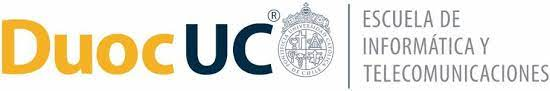

# Examen Transversal: Caso Forma A


Integrantes:
* Cristian Contreras V.
* Diego Gieminiani G.
* Alejandro Ferrera H.

Docente: Marco Antonio Japke    

Sección: DLY0100 - 003V

## Parte 0. Conocimiento y Entendimiento del negocio




Instalación e importación de librerias

In [ ]:
%pip install tensorflow > NUL 2>&1
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import time
import pandas as pd
from IPython.display import display

Note: you may need to restart the kernel to use updated packages.


Cargamos el dataset desde tensorflow.keras y lo guardamos en las divisiones correspondientes

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

# Cargamos el dataset, notemos que ya viene dividido
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(f'''Notamos que el dataset consta de {(X_train_full.shape[0] + X_test.shape[0]):,} imágenes de {X_train_full.shape[1]}x{X_train_full.shape[2]} pixeles cada una.
Además, cada pixel tiene un valor entre {X_train_full.min()} y {X_train_full.max()}.\nEl cual esta dividido en {X_train_full.shape[0]:,} registros de entrenamiento y {X_test.shape[0]:,} de prueba.
También, cada registro tiene una etiqueta que puede ser {np.unique(y_train_full)}.\n''')


Notamos que el dataset consta de 70,000 imágenes de 28x28 pixeles cada una.
Además, cada pixel tiene un valor entre 0 y 255.
El cual esta dividido en 60,000 registros de entrenamiento y 10,000 de prueba.
También, cada registro tiene una etiqueta que puede ser [0 1 2 3 4 5 6 7 8 9].



Usaremos nombres para los tipos de registros en vez de indices según la tabla adjunta.

In [ ]:
class_names = ["Camiseta/top", "Pantalón", "Suéter", "Vestido", "Abrigo",
               "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"]


#### Un gráfico para visualizar algunos datos muestra del dataset

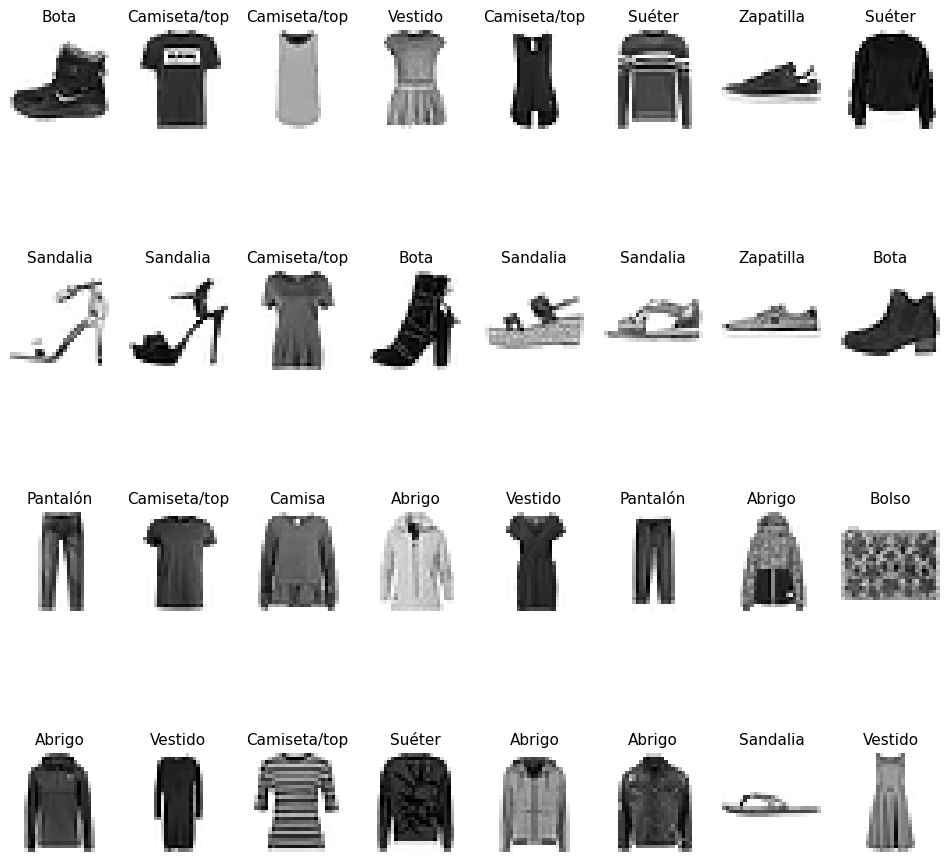

In [ ]:
height = 4
width = 8
fig , axs = plt.subplots(height,width, figsize=(12,12))
for col in range(height):
    for row in range(width):
        index = col*width + row
        plt.subplot(height, width, index+1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=11)
plt.show()

## Parte 1. Implementación de Red Feed Fordward Fully Connected (MLP)


Importar librerías necesarias, lectura de archivos, implementación y construcción de la red neuronal artificial.

Probar con diferentes funciones de activación y elegir alguna justificando su decisión. Modificar la cantidad de capas, la cantidad de épocas y neuronas por capa y registrar a continuación algunos resultados de la ejecución con sus respectivos hiperparámetros.

Carga de dataset

Para implementar la **Red Feed Forward Fully Connected** necesitaremos realizar lo siguiente
1. Modificación del tamaño de la matriz
Cambiaremos la estructura del dataset de 60.000 imagenes de 28x28 pixeles a una muestra de 60.000 pero con un vector unidimensional

In [ ]:
X_mlp = X_train_full.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)
X_mlp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

2. Normalizar los valores del vector, para dejarlos entre 0 y 1, para eso dividiremos los valores en 255 ya que es el maximo valor que puede tomar los datos dentro del vector

In [ ]:
X_mlp = X_mlp.astype('float32') / 255
X_test = X_test.astype('float32') / 255

3. Realizar one-hot encoding al dataset con las etiquetas

In [ ]:
Y_mlp = keras.utils.to_categorical(y_train_full, 10)
y_test = keras.utils.to_categorical(y_test, 10)
Y_mlp

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

4. Asignar variables para la cantidad de ejemplos, neuronas de entrada y neuronas de salidas

In [ ]:
# cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X_mlp.shape[0]
N = X_mlp.shape[1]
C = Y_mlp.shape[1]

print(f"Ejemplos: {M}\nNeuronas de entrada: {N}\nNeuronas de salida:{C}")

Ejemplos: 60000
Neuronas de entrada: 784
Neuronas de salida:10


5. Implementaremos las capas escondidas

In [ ]:
h1 = 256
h2 = 128
h3 = 64
h4 = 32

6. Entrenamiento de los modelos

In [ ]:
def modelar(model, name, optimizer, epochs, batch_size, x, y, x_test=None, y_test=None, callbacks=None) :
    resultados = []
    # contar tiempo de ejecucion de la funcion
    start = time.time()
    # definir modelo
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    if x_test is not None and y_test is not None:
        validation_data = (x_test, y_test)
    else:
        validation_data = None
        val_acc = None
        val_loss = None

    if callbacks is not None:
        model_training = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=validation_data, callbacks=callbacks)
    else:

        model_training = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=validation_data)

    # contar tiempo de ejecucion de la funcion
    end = time.time()
    execute = end - start

    #Perdida y accuracy
    perdida = model_training.history['loss'][-1]
    accuracy = model_training.history['accuracy'][-1]

    print(f"Tiempo de ejecución: {execute} segundos")
    if validation_data is not None:
        val_acc = model_training.history['val_accuracy'][-1]
        val_loss = model_training.history['val_loss'][-1]
    resultados = {
        "Nombre": name,
        "Tiempo de ejecución": execute,
        "Perdida": perdida,
        "Accuracy": accuracy,
        "Modelo": model_training,
        "Val_Accuracy": val_acc,
        "Val_Loss": val_loss
    }

    return resultados


In [ ]:
def grafica_modelo(modelo, boolean=False):
    fig, axs = plt.subplots(1, 2, figsize=(14, 8))  # 2 filas, 1 columna


    # Gráfico de pérdida
    axs[0].plot(modelo["Modelo"].history['loss'])
    title_loss = f'{modelo["Nombre"]} - Pérdida'
    axs[0].set_title(title_loss)
    axs[0].set_xlabel('Época')

    # Gráfico de precisión
    axs[1].plot(modelo["Modelo"].history['accuracy'])
    title_accuracy = f'{modelo["Nombre"]} - % Acierto'
    axs[1].set_title(title_accuracy)
    axs[1].set_xlabel('Época')
    if boolean == True:
        axs[0].plot(modelo["Modelo"].history['val_loss'])
        axs[1].plot(modelo["Modelo"].history['val_accuracy'])

    plt.tight_layout()
    plt.show()

In [ ]:
models_info=[]

6.1. ReLu con 2 capas ocultas (128 - 32)

Epoch 1/20


c:\Users\nibal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.6729 - loss: 1.0564
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.8233 - loss: 0.5086
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.8422 - loss: 0.4555
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8524 - loss: 0.4246
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8568 - loss: 0.4077
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.8620 - loss: 0.3916
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8694 - loss: 0.3789
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8721 - loss: 0.3623
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8770 - loss: 0.3494
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8782 - loss: 0.3444
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8825 - loss: 0.3352
Epoch 12/20
1875/1875 ━━━━━━━━━━━

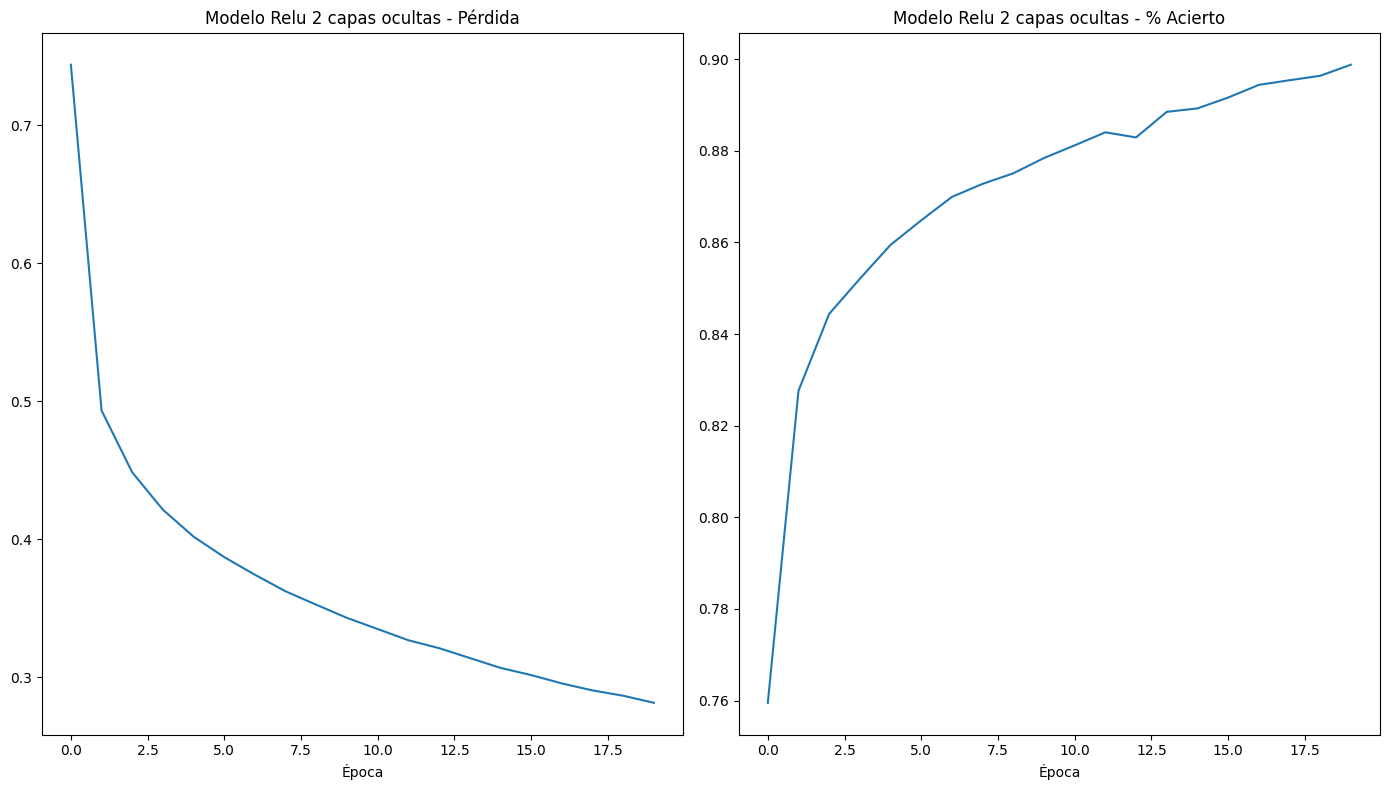

In [ ]:
relu_2 = keras.Sequential()
relu_2.add(keras.layers.Dense(h2, input_dim=N, activation='relu', name='primera_capa'))
relu_2.add(keras.layers.Dense(h4, activation='relu', name='segunda_capa'))
relu_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(relu_2, 'Modelo Relu 2 capas ocultas', 'sgd', 20 , 32 , X_mlp, Y_mlp )
models_info.append(model)
grafica_modelo(model)

  6.2. ReLu con 3 capas ocultas (256 - 64 - 32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6546 - loss: 1.0522
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8253 - loss: 0.4938
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8469 - loss: 0.4331
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8572 - loss: 0.4022
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8660 - loss: 0.3789
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8721 - loss: 0.3624
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8765 - loss: 0.3427
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8753 - loss: 0.3385
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8843 - loss: 0.3204
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8847 - loss: 0.3102
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8902 - loss: 0.3030
Epoch 12/20
1875/1875 ━━━━━━━━

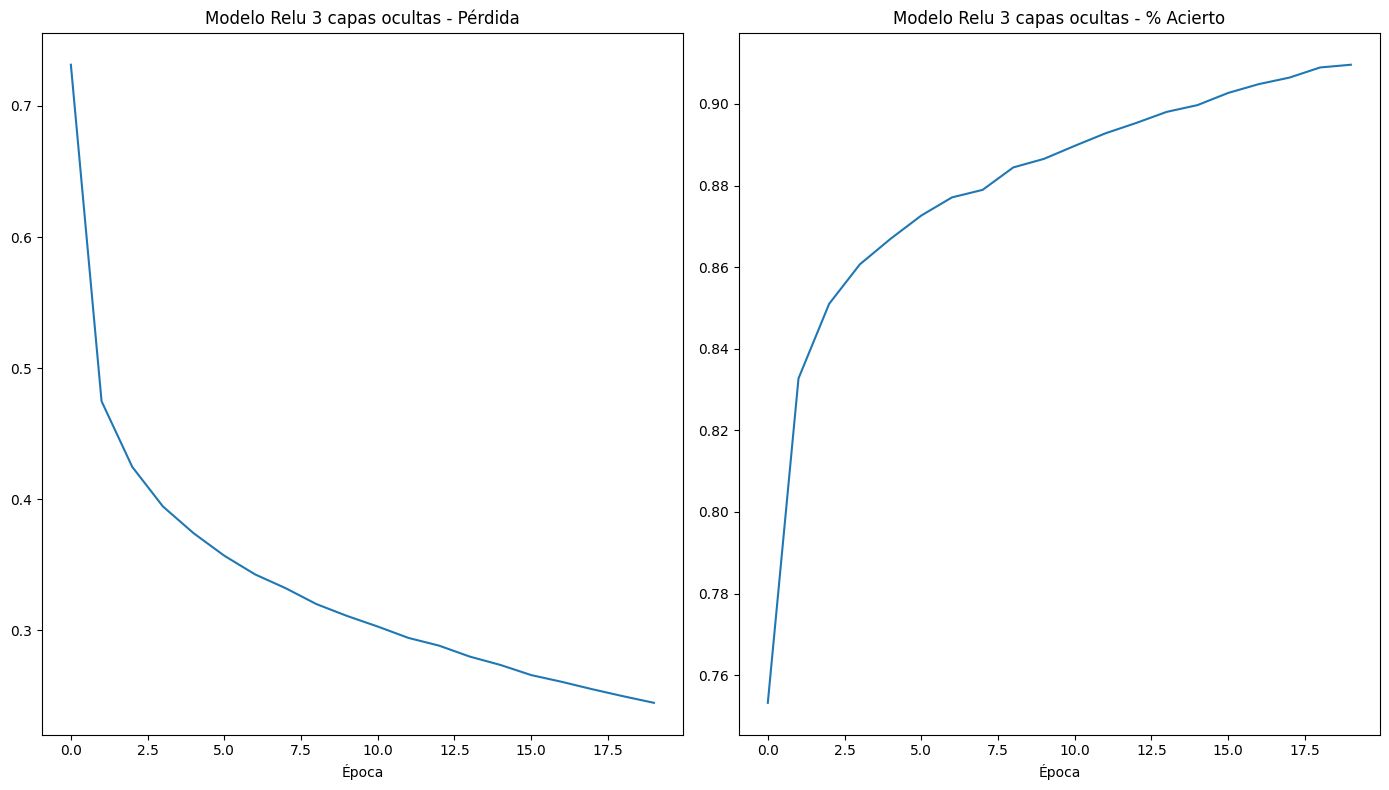

In [ ]:
relu_3 = keras.Sequential()
relu_3.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
relu_3.add(keras.layers.Dense(h3, activation='relu', name='segunda_capa'))
relu_3.add(keras.layers.Dense(h4, activation='relu', name='tercera_capa'))
relu_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(relu_3, 'Modelo Relu 3 capas ocultas', 'sgd', 20 , 32 , X_mlp, Y_mlp )
models_info.append(model)
grafica_modelo(model)

6.3 ReLu con 4 capas ocultas (256 - 128 - 64 - 32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6253 - loss: 1.0887
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8264 - loss: 0.4970
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8456 - loss: 0.4333
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8577 - loss: 0.4021
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8683 - loss: 0.3699
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8731 - loss: 0.3517
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8772 - loss: 0.3354
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8824 - loss: 0.3218
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8863 - loss: 0.3121
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8934 - loss: 0.2959
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8958 - loss: 0.2843
Epoch 12/20
1875/1875 ━━━━━━━━

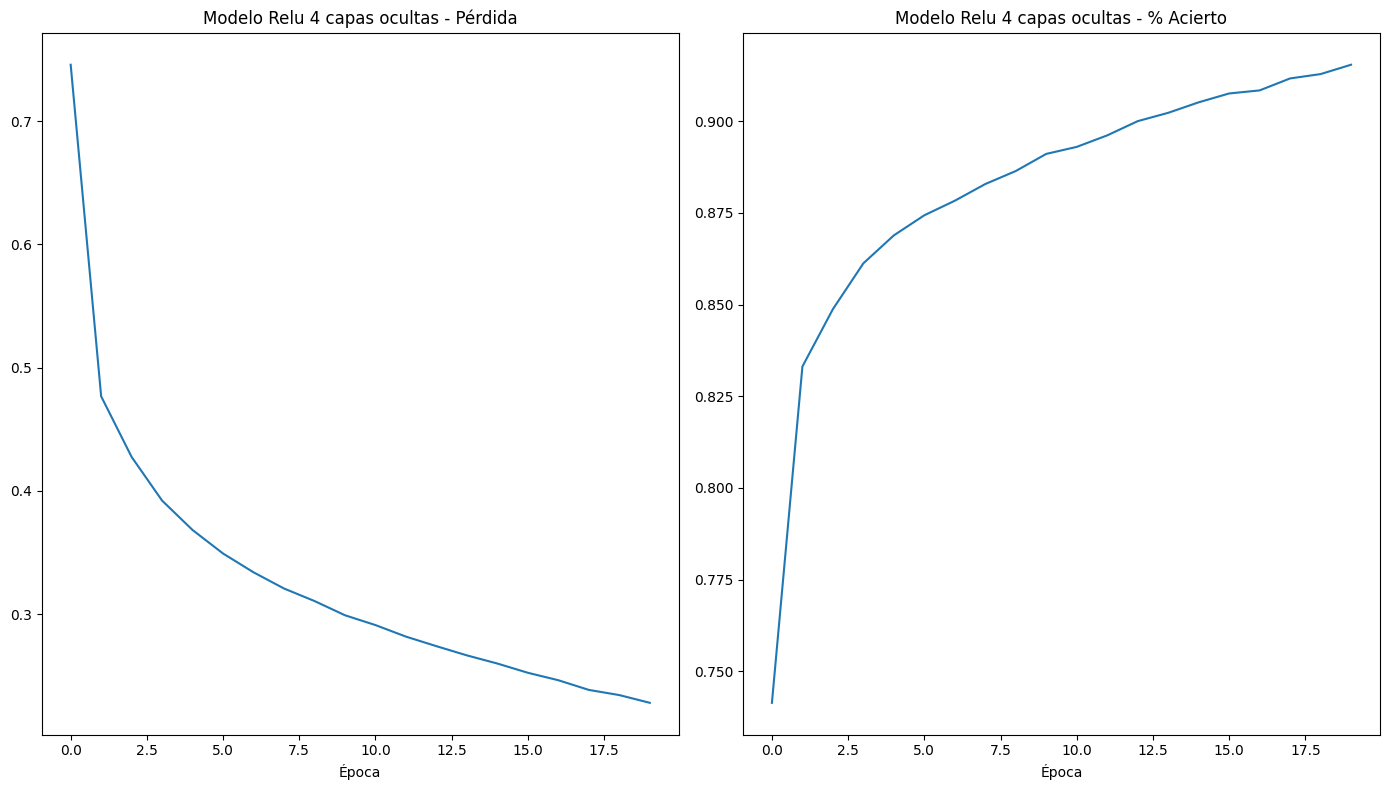

In [ ]:
relu_4 = keras.Sequential()
relu_4.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
relu_4.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
relu_4.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
relu_4.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
relu_4.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(relu_4, 'Modelo Relu 4 capas ocultas', 'sgd', 20 , 32 , X_mlp, Y_mlp )
models_info.append(model)
grafica_modelo(model)

6.4 Tanh con 2 capas ocultas (128 - 32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6709 - loss: 1.0278
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8257 - loss: 0.5077
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8412 - loss: 0.4521
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8492 - loss: 0.4261
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - accuracy: 0.8562 - loss: 0.4072
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.8615 - loss: 0.3904
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.8647 - loss: 0.3809
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.8672 - loss: 0.3717
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.8719 - loss: 0.3611
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.8771 - loss: 0.3448
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.8762 - loss: 0.3449
Epoch 12/20
1875

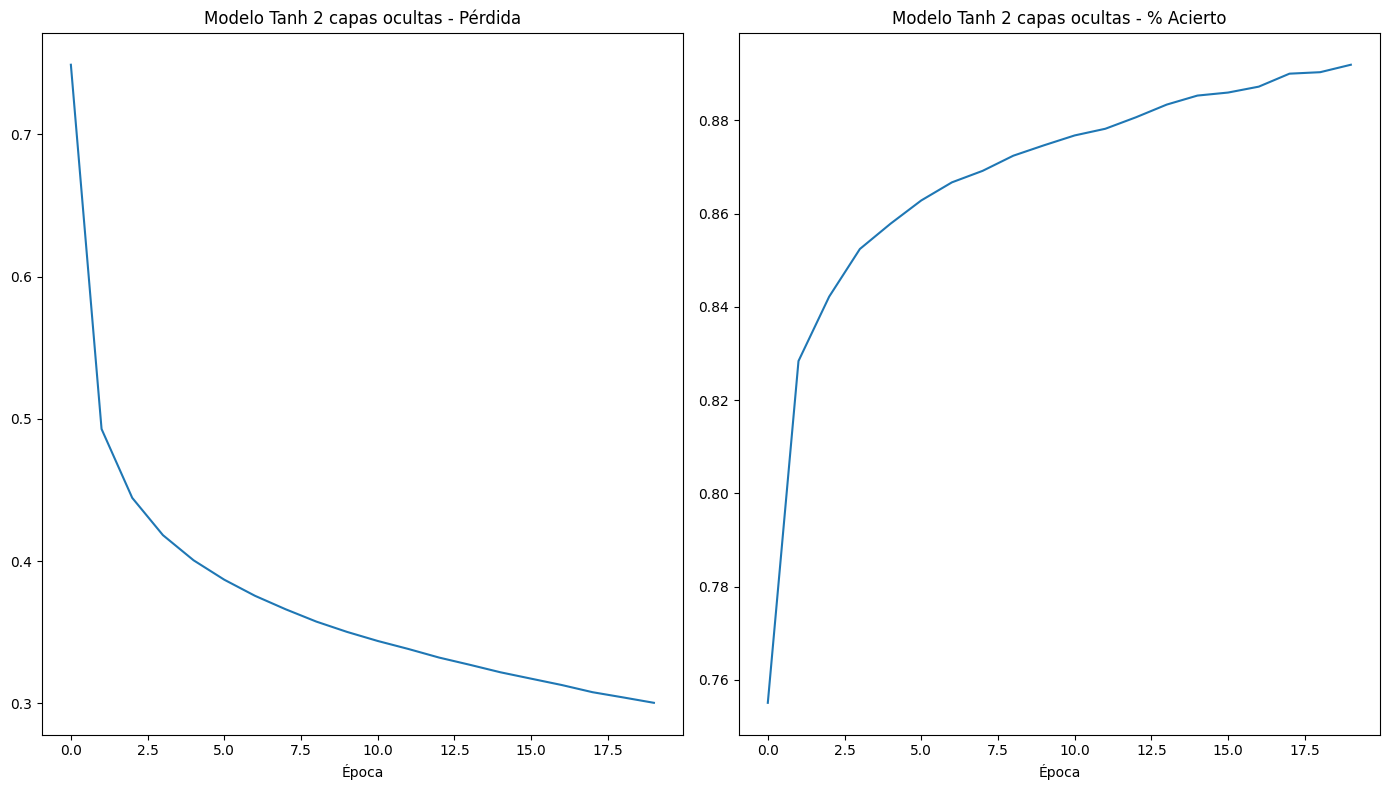

In [ ]:
tanh_2 = keras.Sequential()
tanh_2.add(keras.layers.Dense(h2, input_dim=N, activation='tanh', name='primera_capa'))
tanh_2.add(keras.layers.Dense(h4, activation='tanh', name='segunda_capa'))
tanh_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(tanh_2, 'Modelo Tanh 2 capas ocultas', 'sgd', 20 , 32 , X_mlp, Y_mlp )
models_info.append(model)
grafica_modelo(model)

6.5 Tanh con 3 capas ocultas (256 - 64 - 32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.6937 - loss: 0.9684
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.8310 - loss: 0.4836
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.8494 - loss: 0.4278
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.8581 - loss: 0.3981
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.8595 - loss: 0.3883
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - accuracy: 0.8696 - loss: 0.3632
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - accuracy: 0.8733 - loss: 0.3535
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8761 - loss: 0.3419
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.8804 - loss: 0.3336
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.8832 - loss: 0.3247
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.8840 - loss: 0.3192
Epoch 12/2

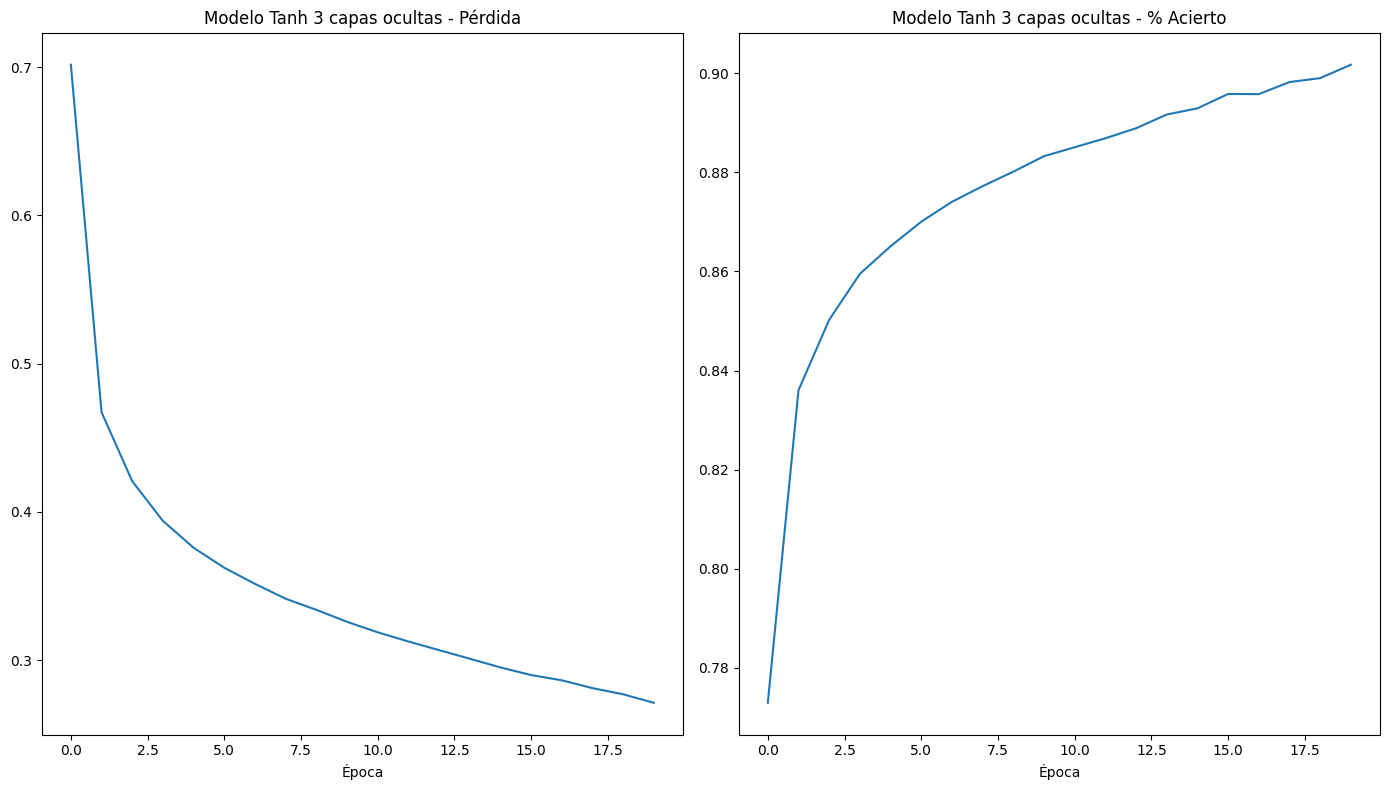

In [ ]:
tanh_3 = keras.Sequential()
tanh_3.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
tanh_3.add(keras.layers.Dense(h3, activation='tanh', name='segunda_capa'))
tanh_3.add(keras.layers.Dense(h4, activation='tanh', name='tercera_capa'))
tanh_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(tanh_3, 'Modelo Tanh 3 capas ocultas', 'sgd', 20 , 32 , X_mlp, Y_mlp )
models_info.append(model)
grafica_modelo(model)

6.6 Tanh con 4 capas ocultas (256 - 128 - 64 - 32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6971 - loss: 0.9462
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8333 - loss: 0.4754
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8498 - loss: 0.4256
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8583 - loss: 0.3947
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8663 - loss: 0.3750
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8706 - loss: 0.3601
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8747 - loss: 0.3463
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8782 - loss: 0.3348
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8846 - loss: 0.3232
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8845 - loss: 0.3181
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8885 - loss: 0.3060
Epoch 12/20
1875/1875 ━━━━━━━━

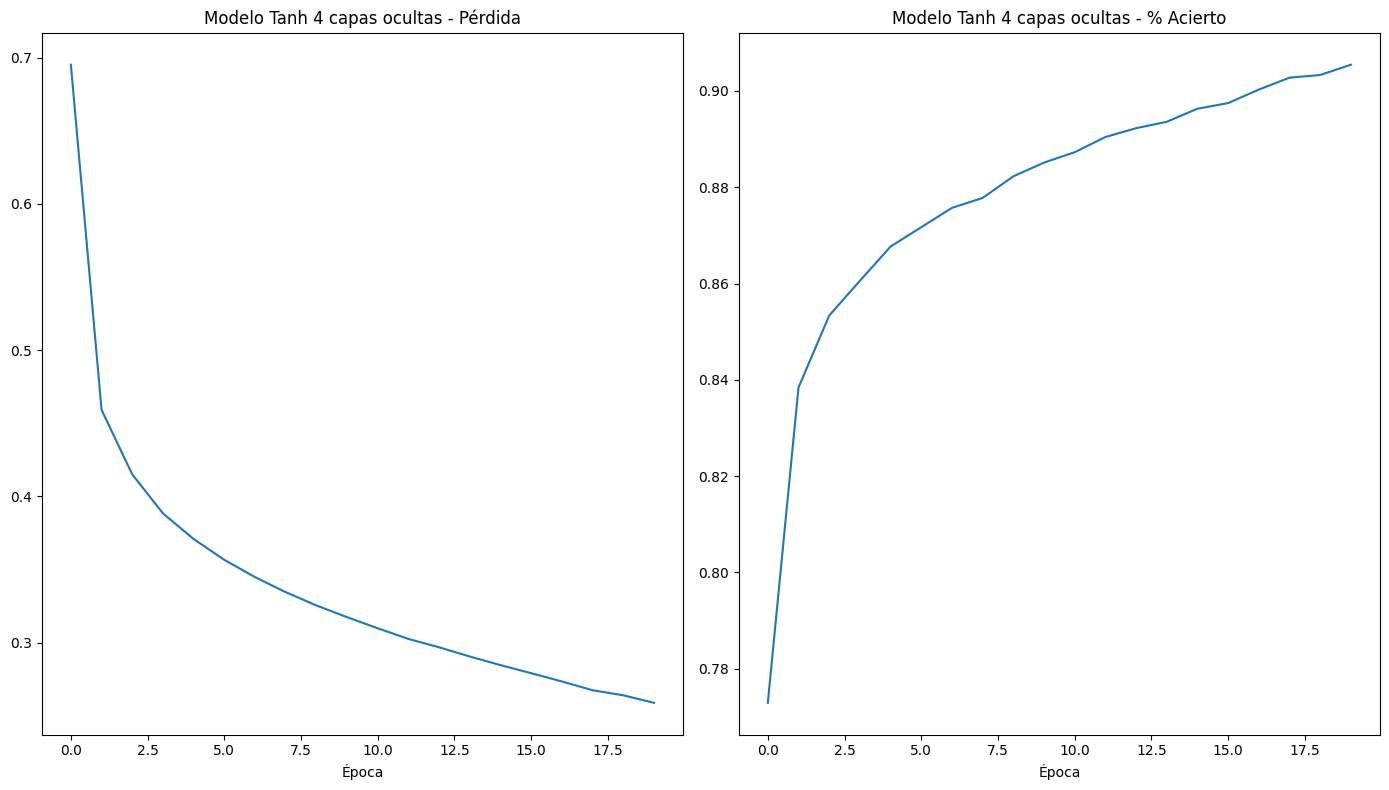

In [ ]:
tanh_4 = keras.Sequential()
tanh_4.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
tanh_4.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
tanh_4.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
tanh_4.add(keras.layers.Dense(h4, activation='tanh', name='cuarta_capa'))
tanh_4.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(tanh_4, 'Modelo Tanh 4 capas ocultas', 'sgd', 20 , 32 , X_mlp, Y_mlp )
models_info.append(model)
grafica_modelo(model)

6.7 Sigmoid con 2 capas ocultas (128 - 32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 733us/step - accuracy: 0.2948 - loss: 2.2437
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.5644 - loss: 1.5815
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.6503 - loss: 1.1480
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.6958 - loss: 0.9582
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.7236 - loss: 0.8384
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.7407 - loss: 0.7557
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.7509 - loss: 0.7013
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.7563 - loss: 0.6585
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.7653 - loss: 0.6322
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.7781 - loss: 0.6062
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.7851 - loss: 0.5815
Epoch 12

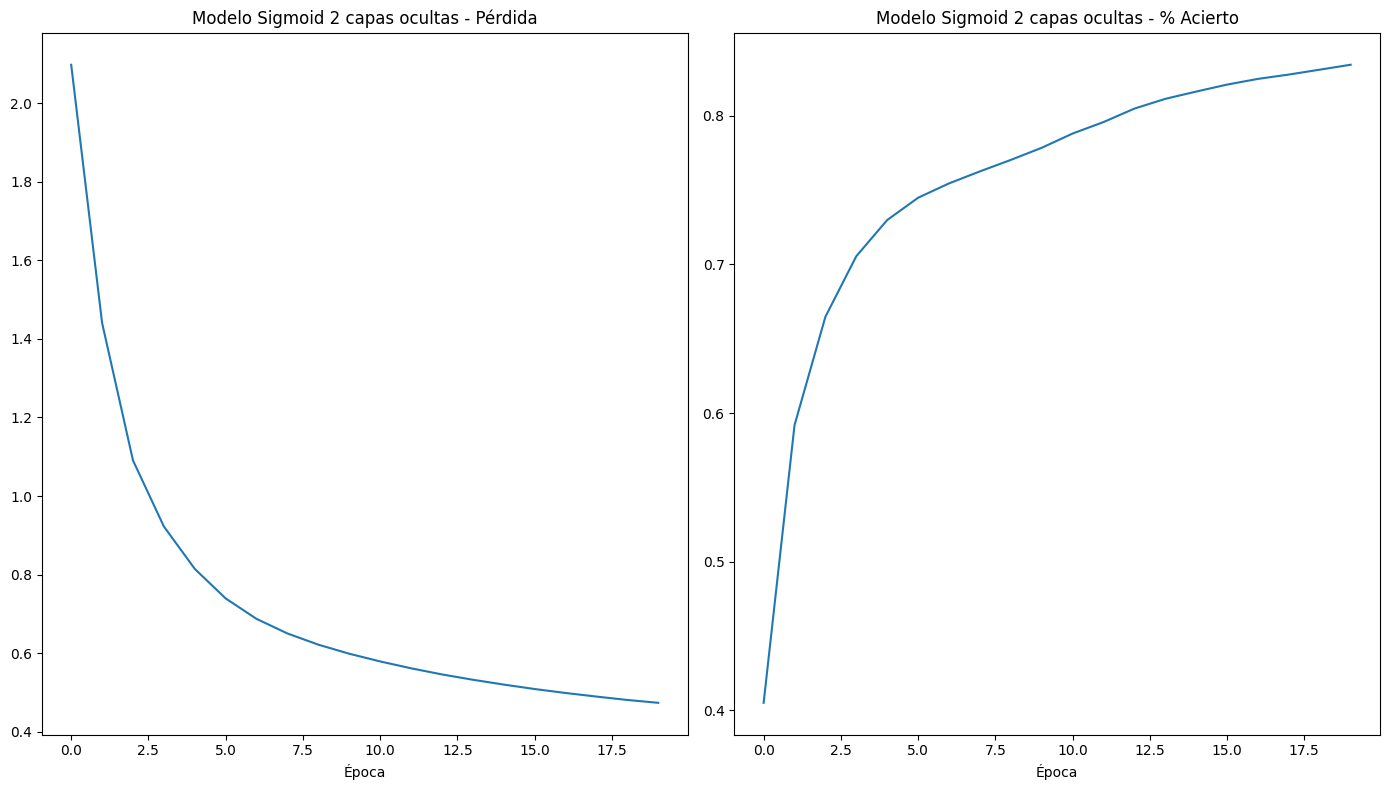

In [ ]:
sigmoid_2 = keras.Sequential()
sigmoid_2.add(keras.layers.Dense(h2, input_dim=N, activation='sigmoid', name='primera_capa'))
sigmoid_2.add(keras.layers.Dense(h4, activation='sigmoid', name='segunda_capa'))
sigmoid_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(sigmoid_2, 'Modelo Sigmoid 2 capas ocultas', 'sgd', 20 , 32 , X_mlp, Y_mlp )
models_info.append(model)
grafica_modelo(model)

6.8 Sigmoid con 3 capas ocultas (256 - 64 - 32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1454 - loss: 2.3228
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3107 - loss: 2.1912
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.3692 - loss: 1.7863
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.4954 - loss: 1.5083
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.5790 - loss: 1.2736
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.6008 - loss: 1.1259
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.6296 - loss: 1.0304
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.6668 - loss: 0.9505
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.6996 - loss: 0.8750
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - accuracy: 0.7225 - loss: 0.8120
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.7286 - loss: 0.7739
Epoch 12/20


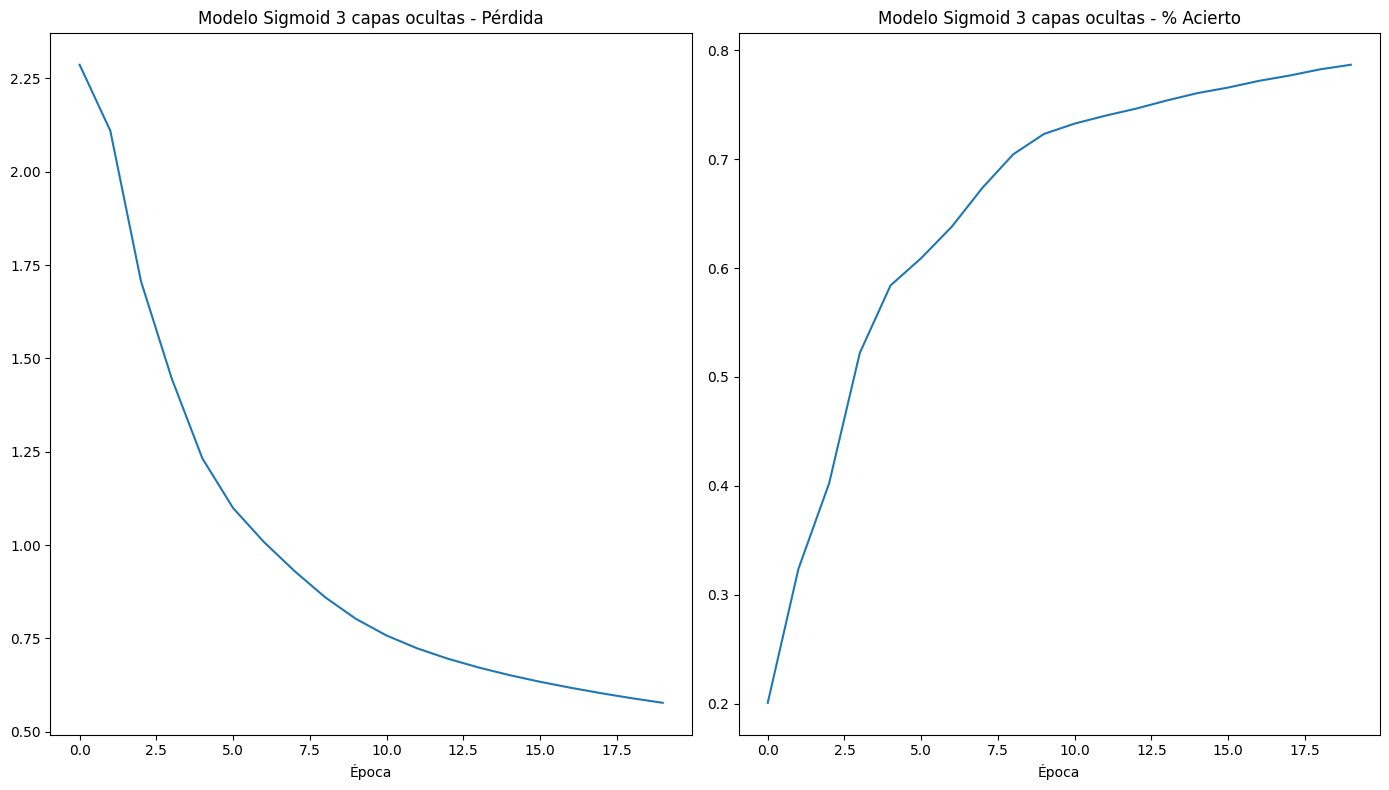

In [ ]:
sigmoid_3 = keras.Sequential()
sigmoid_3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
sigmoid_3.add(keras.layers.Dense(h3, activation='sigmoid', name='segunda_capa'))
sigmoid_3.add(keras.layers.Dense(h4, activation='sigmoid', name='tercera_capa'))
sigmoid_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(sigmoid_3, 'Modelo Sigmoid 3 capas ocultas', 'sgd', 20 , 32 , X_mlp, Y_mlp )
models_info.append(model)
grafica_modelo(model)

6.9 Sigmoid con 4 capas ocultas (256 - 128 - 64 - 32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1053 - loss: 2.3099
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1127 - loss: 2.3003
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1311 - loss: 2.2977
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1569 - loss: 2.2933
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2077 - loss: 2.2854
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2694 - loss: 2.2644
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2753 - loss: 2.1743
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3133 - loss: 1.8676
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4018 - loss: 1.6127
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4768 - loss: 1.3792
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5605 - loss: 1.2094
Epoch 12/20
1875/1875 ━━━━━━━━

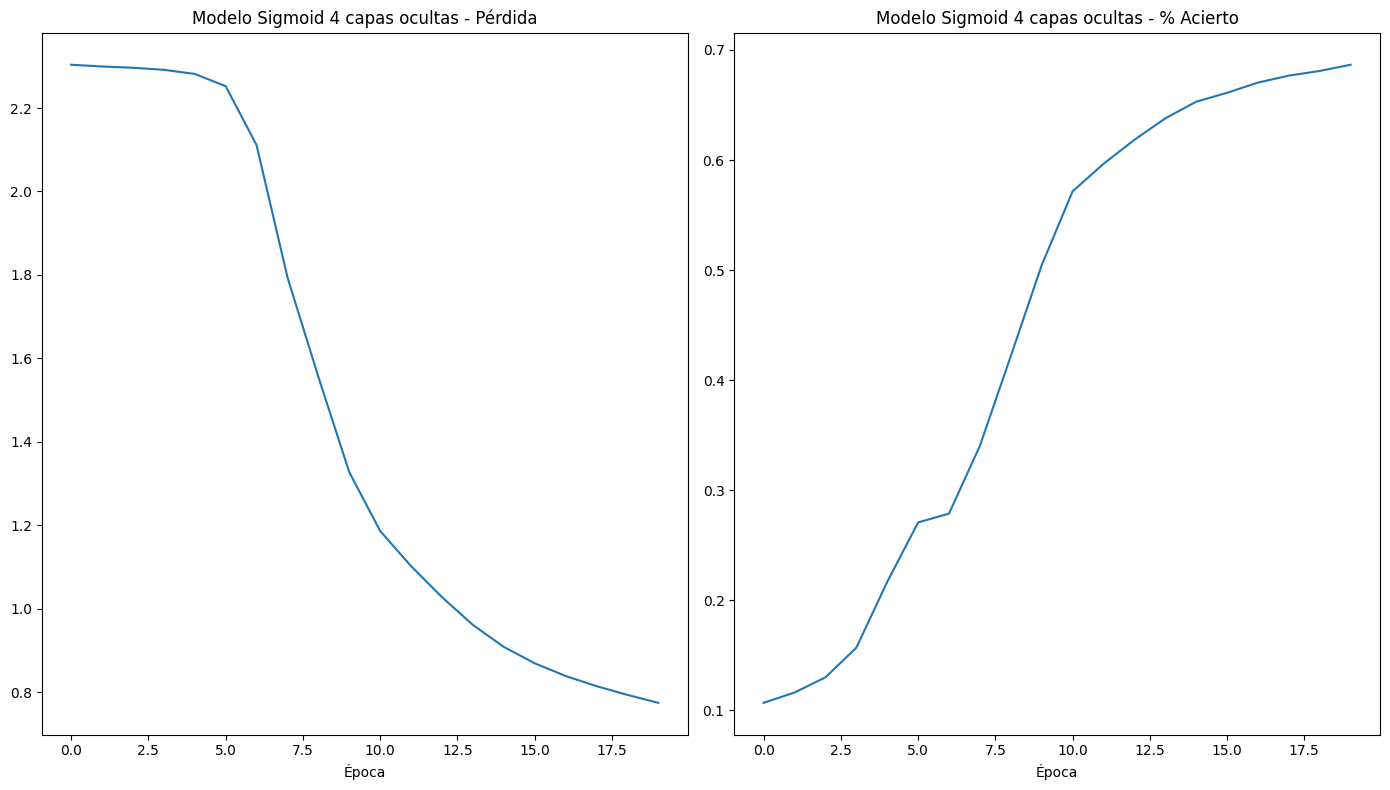

In [ ]:
sigmoid_4 = keras.Sequential()
sigmoid_4.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
sigmoid_4.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
sigmoid_4.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
sigmoid_4.add(keras.layers.Dense(h4, activation='sigmoid', name='cuarta_capa'))
sigmoid_4.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(sigmoid_4, 'Modelo Sigmoid 4 capas ocultas', 'sgd', 20 , 32 , X_mlp, Y_mlp )
models_info.append(model)
grafica_modelo(model)

Resumen y mejor Modelo

In [ ]:
best_model = None
model_acc = 0
for model in models_info:
    if model['Modelo'].history['accuracy'][-1] > model_acc:
        model_acc = model['Modelo'].history['accuracy'][-1]
        best_model = model

print(f"El mejor modelo es: {best_model['Nombre']} con una precisión de {model_acc * 100:.2f} %")

El mejor modelo es: Modelo Relu 4 capas ocultas con una precisión de 91.54 %


Tiempo de Ejecución y % Acierto del modelo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

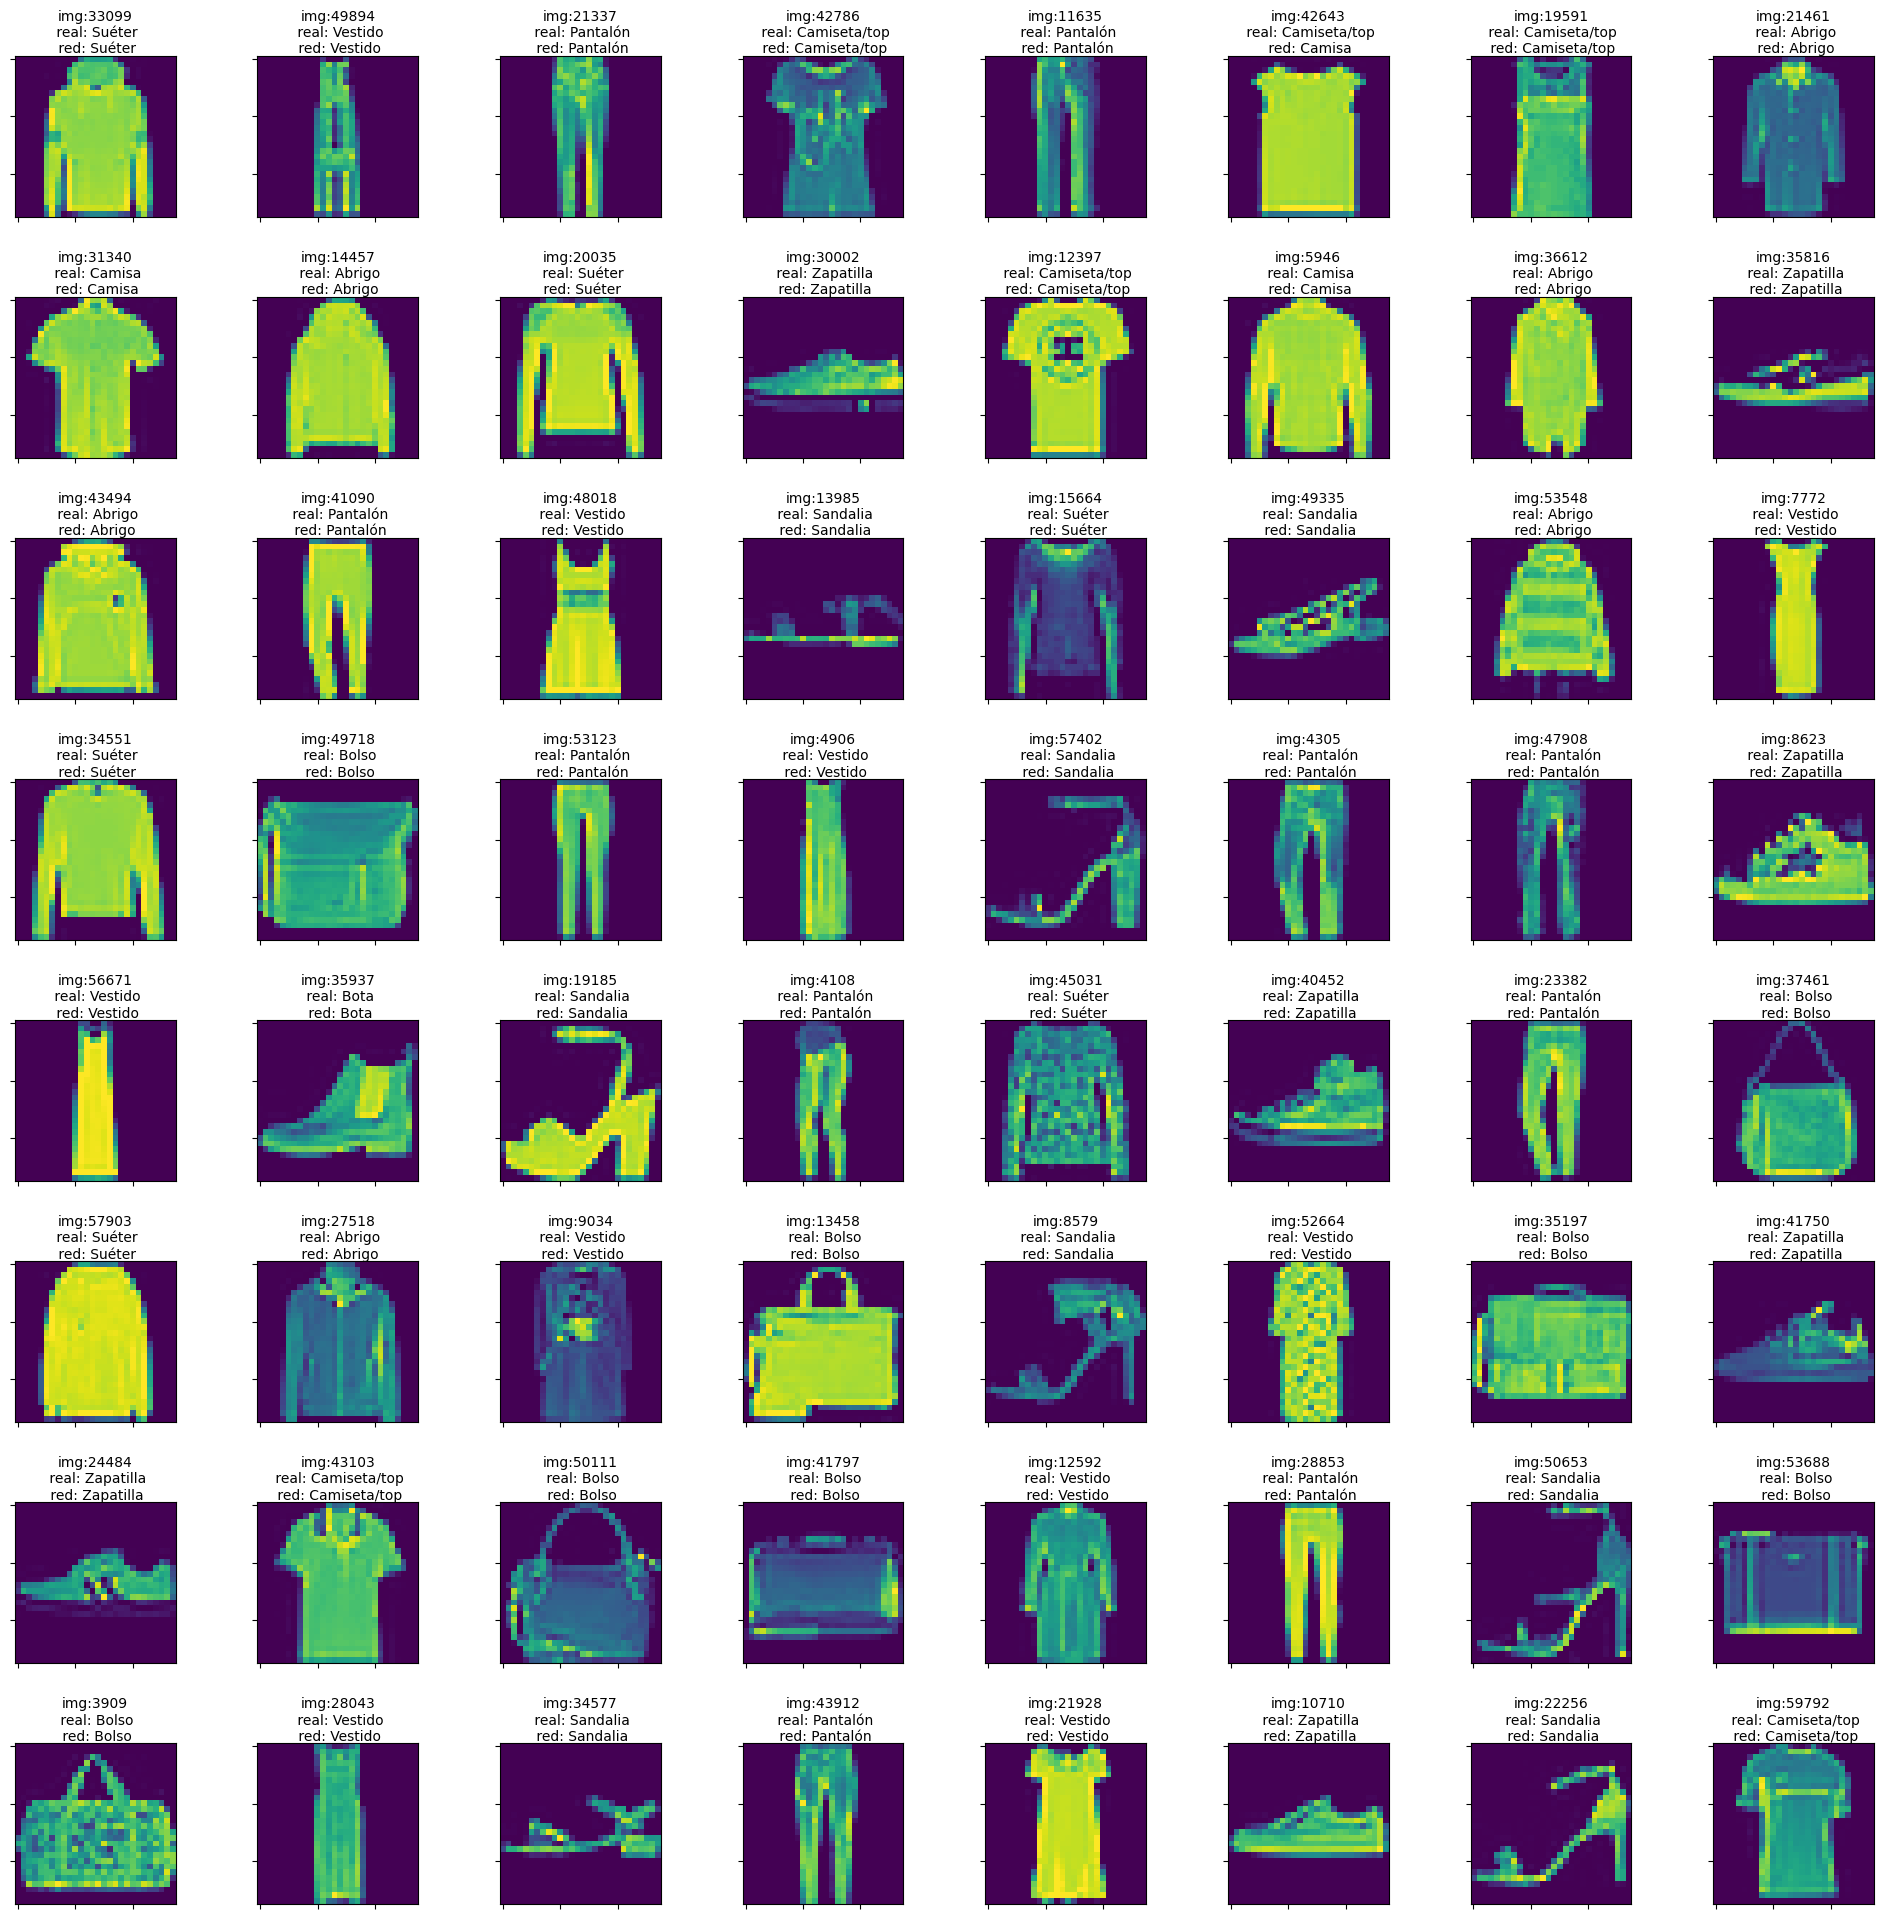

In [ ]:
# Veamos algunas predicciones
h = 8
w = 8

fig, axs = plt.subplots(h, w, figsize=(3*h,3*w))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(X_train_full))
    Xin = X_mlp[ex].reshape(1,28*28)
    Ypred = best_model['Modelo'].model.predict(Xin).reshape(10)
    lpred = np.argmax(Ypred)

    axs[i,j].set_title("img:" + str(ex) + "\n real: " + str(class_names[y_train_full[ex]]) + "\n red: " + str(class_names[lpred]), fontsize=10, pad=1)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(X_train_full[ex])

In [ ]:
df = pd.DataFrame(models_info, columns=['Nombre', 'Tiempo de ejecución', 'Perdida', 'Accuracy'])
df.sort_values(by='Accuracy', ascending=False, inplace=True)
df

,Nombre,Tiempo de ejecución,Perdida,Accuracy
2,Modelo Relu 4 capas ocultas,64.265838,0.227968,0.915383
1,Modelo Relu 3 capas ocultas,58.566704,0.244551,0.909617
5,Modelo Tanh 4 capas ocultas,43.041011,0.258834,0.905450
4,Modelo Tanh 3 capas ocultas,36.734406,0.271141,0.901717
0,Modelo Relu 2 capas ocultas,39.867739,0.281320,0.898800
3,Modelo Tanh 2 capas ocultas,31.241187,0.300465,0.891950
6,Modelo Sigmoid 2 capas ocultas,27.228989,0.473639,0.834283
7,Modelo Sigmoid 3 capas ocultas,37.214678,0.577404,0.786683
8,Modelo Sigmoid 4 capas ocultas,41.303661,0.774274,0.686567


$$
\begin{aligned}
& \hspace{20mm} \text{Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP)} \\
& \begin{array}{cccc}
\hline \hline
& \text{ReLu} & \text{Tanh} & \text{Sigmoid} \\
\hline \hline
& \text{val_acc} \hspace{10mm} \text{tiempo_s} & \text{val_acc} \hspace{10mm} \text{tiempo_s} & \text{val_acc} \hspace{10mm} \text{tiempo_s} \\
\hline
\text{2 capas ocultas} & {89.75} & {27.28} & {89.49} & {37.61} & {83.45} & {38.89} \\
\text{3 capas ocultas} & {91.01} & {36.38} & {90.09} & {67.16} & {78.26} & {53.55} \\
\text{4 capas ocultas} & {91.64} & {39.68} & {90.40} & {67.26} & {70.19} & {42.61} \\
\hline
\end{array}
\end{aligned}
$$

Para completar la tabla en LaTeX seguir los siguientes pasos:

Hacer doble clic en la tabla y completar los valores dentro de las llaves de las líneas así:

* Ejemplo:\hline \text{ 2 capas ocultas }& {7.2} & {8.0} & {1.3} & {3.5} & {0.8} & {5.1}

Insertar en este espacio las conclusiones que obtuvieron tras cambiar diversos parámetros e hiperparámetros de la red construida.
Indiquen si hubo cambios significativos en el tiempo de entrenamiento, si impactó la precisión en la clasificación y por qué cambian los tiempos de entrenamiento con una función versus otra.

## Parte 2. Backpropagation

Explicar en este apartado qué es backpropagation y cuál es su función en las redes neuronales artificiales.
Cuál es la diferencia que tiene backpropagation con el descenso de gradiente y en qué consiste este último concepto.



Backpropagation en Fashion MNIST:

Propagación hacia adelante: Se toma una imagen de una prenda de vestir del conjunto de datos y se pasa a través de la red neuronal, capa por capa. Cada capa aplica una transformación lineal (producto punto entre los pesos y las entradas) seguida de una función de activación, como ReLU (Rectified Linear Unit) en las capas ocultas y una función softmax en la capa de salida. Esto produce una salida de la red, que son las probabilidades de que la imagen pertenezca a cada una de las clases de prendas de vestir.

Retropropagación del error: Se calcula el error entre las probabilidades predichas por la red y las etiquetas reales de las imágenes del conjunto de datos (por ejemplo, si la imagen es un pantalón, la etiqueta correspondiente es "pantalón"). Luego, este error se propaga hacia atrás a través de la red, capa por capa, calculando el gradiente de la función de pérdida (como la entropía cruzada) con respecto a los pesos de las conexiones. Este gradiente indica cómo cambiar los pesos para reducir el error de predicción.

Descenso de gradiente en Fashion MNIST:

El descenso de gradiente es el proceso de actualizar los pesos de las conexiones de la red neuronal en función del gradiente calculado durante la retropropagación del error. En el contexto de Fashion MNIST, esto implica ajustar los pesos para minimizar la función de pérdida (que mide la discrepancia entre las predicciones de la red y las etiquetas reales).

Descenso de gradiente estocástico (SGD): En cada iteración del entrenamiento, se selecciona aleatoriamente un lote de imágenes del conjunto de datos. Se calcula el error y el gradiente correspondiente para ese lote y se actualizan los pesos de la red en función de este gradiente. Este proceso se repite para múltiples iteraciones hasta que se alcanza un criterio de convergencia, como un número máximo de épocas o una tolerancia de error.
El objetivo final de este proceso es entrenar una red neuronal que pueda clasificar con precisión las prendas de vestir en las imágenes del conjunto de datos Fashion MNIST.

## Parte 3. Regularización del modelo

En este apartado, incorporar al modelo construido, técnicas de regularización. Indiquen las diferencias que hay entre las técnicas de regularización y justifiquen que técnica se comportó mejor y por qué. Es importante detallar con qué arquitectura finalmente quedó nuestro modelo para irle incorporando mejoras en los siguientes items.
Si utilizaron Early stopping, justificar y fundamentar el desempeño obtenido, si no lo utilizaron, indicar y fundamentar por qué no.

Epoch 1/20


c:\Users\nibal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4885 - loss: 47.3181 - val_accuracy: 0.5576 - val_loss: 2.7216
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5741 - loss: 2.3822 - val_accuracy: 0.6211 - val_loss: 1.8892
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6504 - loss: 1.8144 - val_accuracy: 0.6627 - val_loss: 1.6977
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6713 - loss: 1.6663 - val_accuracy: 0.6781 - val_loss: 1.6102
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6734 - loss: 1.6059 - val_accuracy: 0.6869 - val_loss: 1.5438
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6773 - loss: 1.5685 - val_accuracy: 0.6494 - val_loss: 1.5972
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6784 - loss: 1.5258 - val_accuracy: 0.6974 - val_loss: 1.4585
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6780 - loss: 1.5101 - val_accura

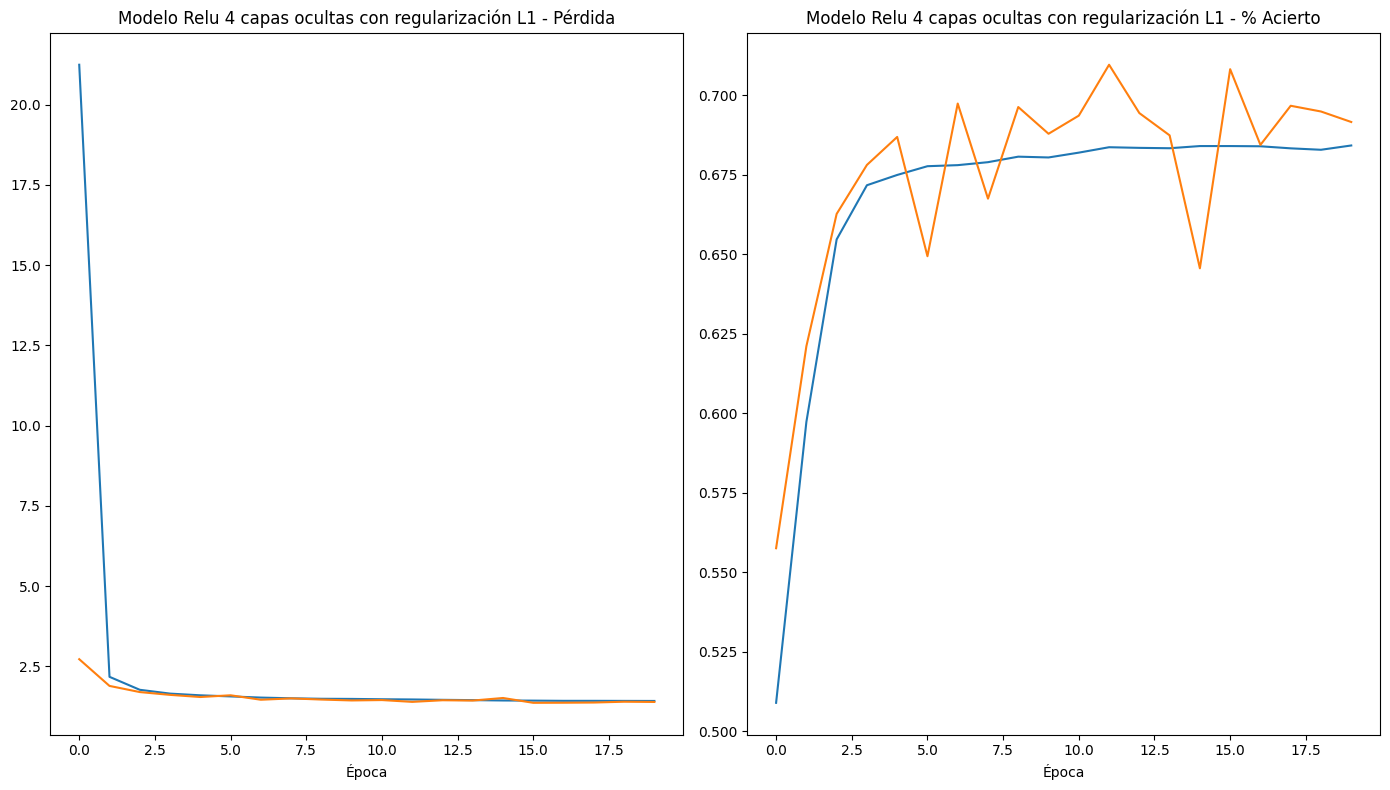

In [ ]:
# regularizacion usando L1 para el mejor modelo

best_model_l1 = keras.Sequential()
best_model_l1.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa', kernel_regularizer=keras.regularizers.l1(0.01)))
best_model_l1.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa', kernel_regularizer=keras.regularizers.l1(0.01)))
best_model_l1.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa', kernel_regularizer=keras.regularizers.l1(0.01)))
best_model_l1.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa', kernel_regularizer=keras.regularizers.l1(0.01)))
best_model_l1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output', kernel_regularizer=keras.regularizers.l1(0.01)))

model = modelar(best_model_l1, 'Modelo Relu 4 capas ocultas con regularización L1', 'sgd', 20 , 32 , X_mlp, Y_mlp, X_test, y_test)
models_info.append(model)
grafica_modelo(model, True)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6307 - loss: 7.1423 - val_accuracy: 0.7994 - val_loss: 4.2025
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8028 - loss: 3.6867 - val_accuracy: 0.8020 - val_loss: 2.5318
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8138 - loss: 2.2646 - val_accuracy: 0.7935 - val_loss: 1.7504
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8161 - loss: 1.6000 - val_accuracy: 0.8132 - val_loss: 1.3464
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8202 - loss: 1.2754 - val_accuracy: 0.8130 - val_loss: 1.1631
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8207 - loss: 1.1189 - val_accuracy: 0.7992 - val_loss: 1.0954
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8233 - loss: 1.0398 - val_accuracy: 0.8162 - val_loss: 1.0258
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8225 - loss: 0.9993 - 

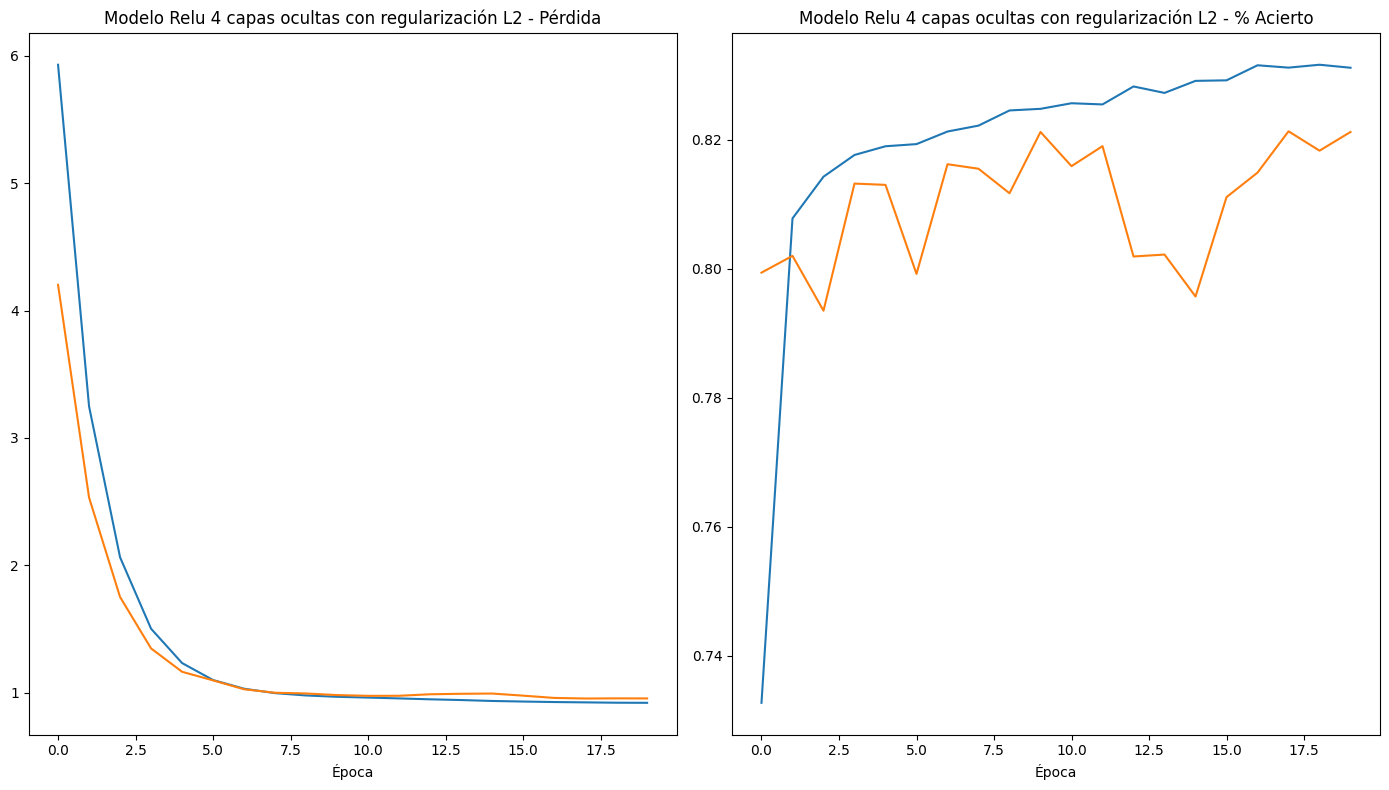

In [ ]:
## Regulacion usando L2 para el mejor modelo

best_model_l2 = keras.Sequential()
best_model_l2.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa', kernel_regularizer=keras.regularizers.l2(0.01)))
best_model_l2.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa', kernel_regularizer=keras.regularizers.l2(0.01)))
best_model_l2.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa', kernel_regularizer=keras.regularizers.l2(0.01)))
best_model_l2.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa', kernel_regularizer=keras.regularizers.l2(0.01)))

best_model_l2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output', kernel_regularizer=keras.regularizers.l2(0.01)))

model = modelar(best_model_l2, 'Modelo Relu 4 capas ocultas con regularización L2', 'sgd', 20 , 32 , X_mlp, Y_mlp, X_test, y_test)
models_info.append(model)
grafica_modelo(model, True)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4441 - loss: 1.5008 - val_accuracy: 0.7490 - val_loss: 0.6792
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7171 - loss: 0.7623 - val_accuracy: 0.8025 - val_loss: 0.5414
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7739 - loss: 0.6319 - val_accuracy: 0.8283 - val_loss: 0.4797
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8020 - loss: 0.5672 - val_accuracy: 0.8387 - val_loss: 0.4484
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8183 - loss: 0.5216 - val_accuracy: 0.8452 - val_loss: 0.4335
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8357 - loss: 0.4823 - val_accuracy: 0.8520 - val_loss: 0.4169
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8404 - loss: 0.4585 - val_accuracy: 0.8517 - val_loss: 0.4083
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8444 - loss: 0.4478 - 

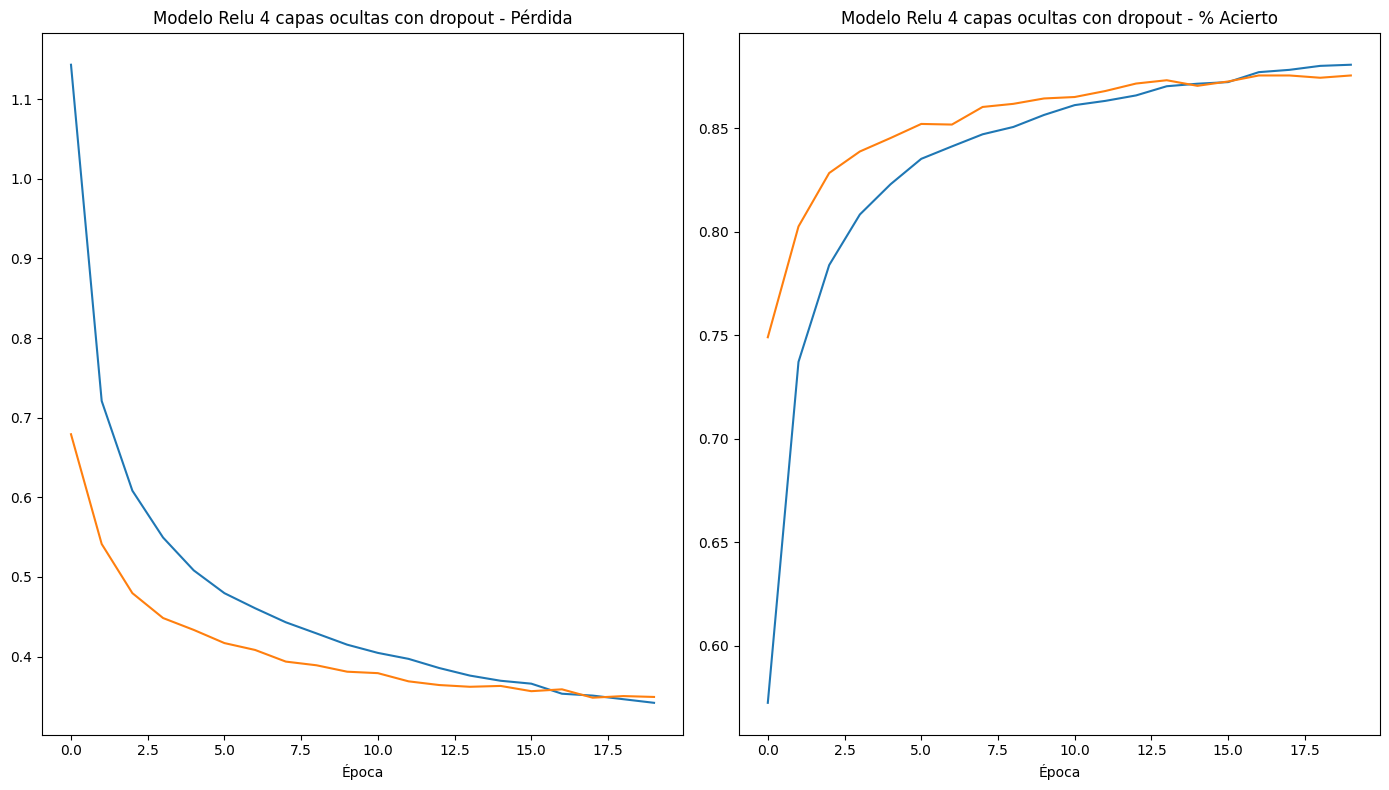

In [ ]:
## Regularizacion usando dropout para el mejor modelo

best_model_dropout = keras.Sequential()
best_model_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
best_model_dropout.add(keras.layers.Dropout(0.2))
best_model_dropout.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
best_model_dropout.add(keras.layers.Dropout(0.2))
best_model_dropout.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
best_model_dropout.add(keras.layers.Dropout(0.2))
best_model_dropout.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
best_model_dropout.add(keras.layers.Dropout(0.2))

best_model_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(best_model_dropout, 'Modelo Relu 4 capas ocultas con dropout', 'sgd', 20 , 32 , X_mlp, Y_mlp, X_test, y_test)
models_info.append(model)
grafica_modelo(model, True)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4164 - loss: 47.5898 - val_accuracy: 0.2494 - val_loss: 2.6126
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2722 - loss: 2.4421 - val_accuracy: 0.2688 - val_loss: 2.2111
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2876 - loss: 2.1854 - val_accuracy: 0.3562 - val_loss: 2.1239
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3062 - loss: 2.1131 - val_accuracy: 0.3400 - val_loss: 2.0696
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3376 - loss: 2.0598 - val_accuracy: 0.3619 - val_loss: 2.0253
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3564 - loss: 2.0208 - val_accuracy: 0.3890 - val_loss: 1.9937
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3694 - loss: 1.9966 - val_accuracy: 0.3976 - val_loss: 1.9678
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3781 - loss: 1.9788 -

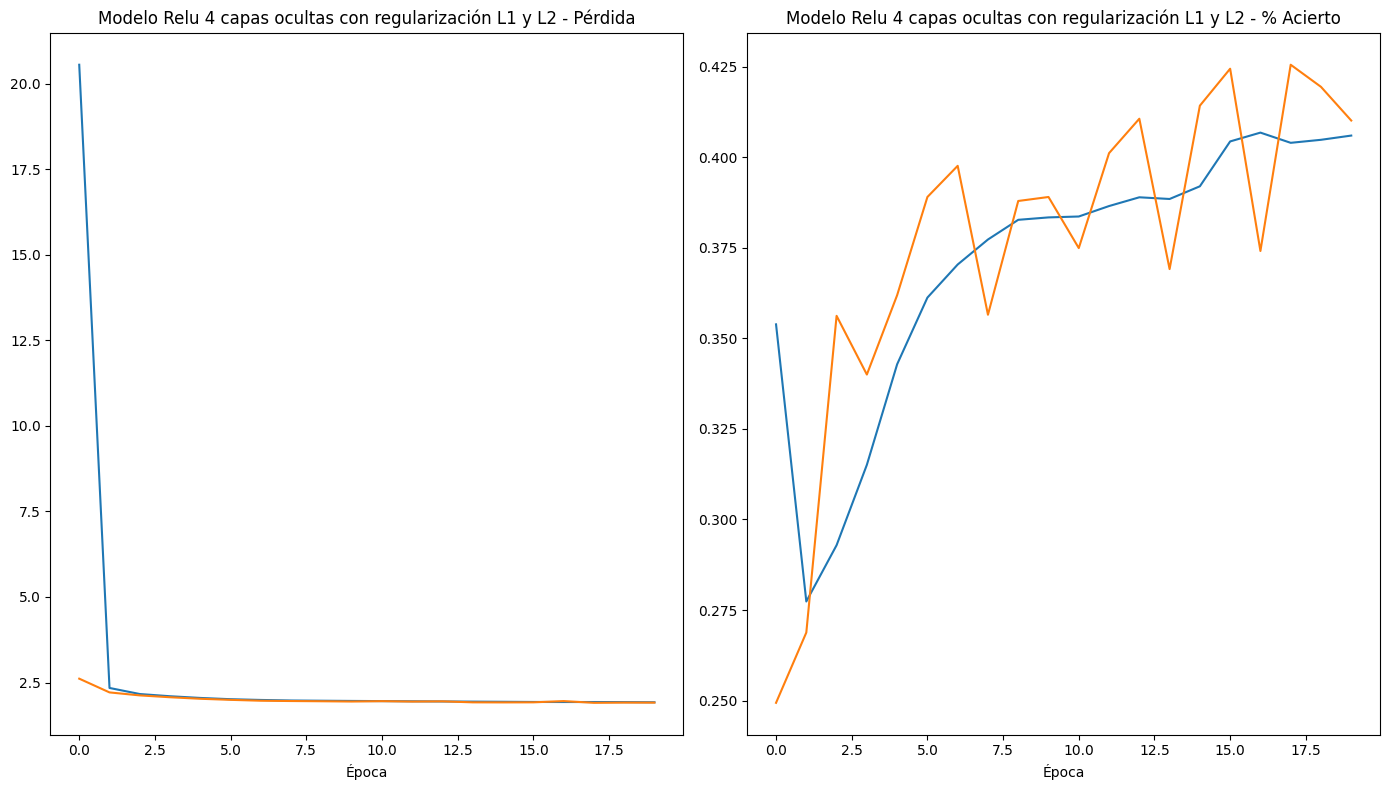

In [ ]:
## Regularizacion del modelo con L1, L2

best_model_l1_l2 = keras.Sequential()
best_model_l1_l2.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa', kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
best_model_l1_l2.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa', kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
best_model_l1_l2.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa', kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
best_model_l1_l2.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa', kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))

best_model_l1_l2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output', kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))

model = modelar(best_model_l1_l2, 'Modelo Relu 4 capas ocultas con regularización L1 y L2', 'sgd', 20 , 32 , X_mlp, Y_mlp, X_test, y_test)
models_info.append(model)
grafica_modelo(model, True)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6350 - loss: 1.1335 - val_accuracy: 0.8024 - val_loss: 0.5575
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8195 - loss: 0.5102 - val_accuracy: 0.8236 - val_loss: 0.4921
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8432 - loss: 0.4373 - val_accuracy: 0.8447 - val_loss: 0.4361
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8545 - loss: 0.4015 - val_accuracy: 0.8513 - val_loss: 0.4064
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8624 - loss: 0.3781 - val_accuracy: 0.8587 - val_loss: 0.3944
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8738 - loss: 0.3492 - val_accuracy: 0.8594 - val_loss: 0.3908
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8751 - loss: 0.3418 - val_accuracy: 0.8622 - val_loss: 0.3810
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8814 - loss: 0.3220 - 

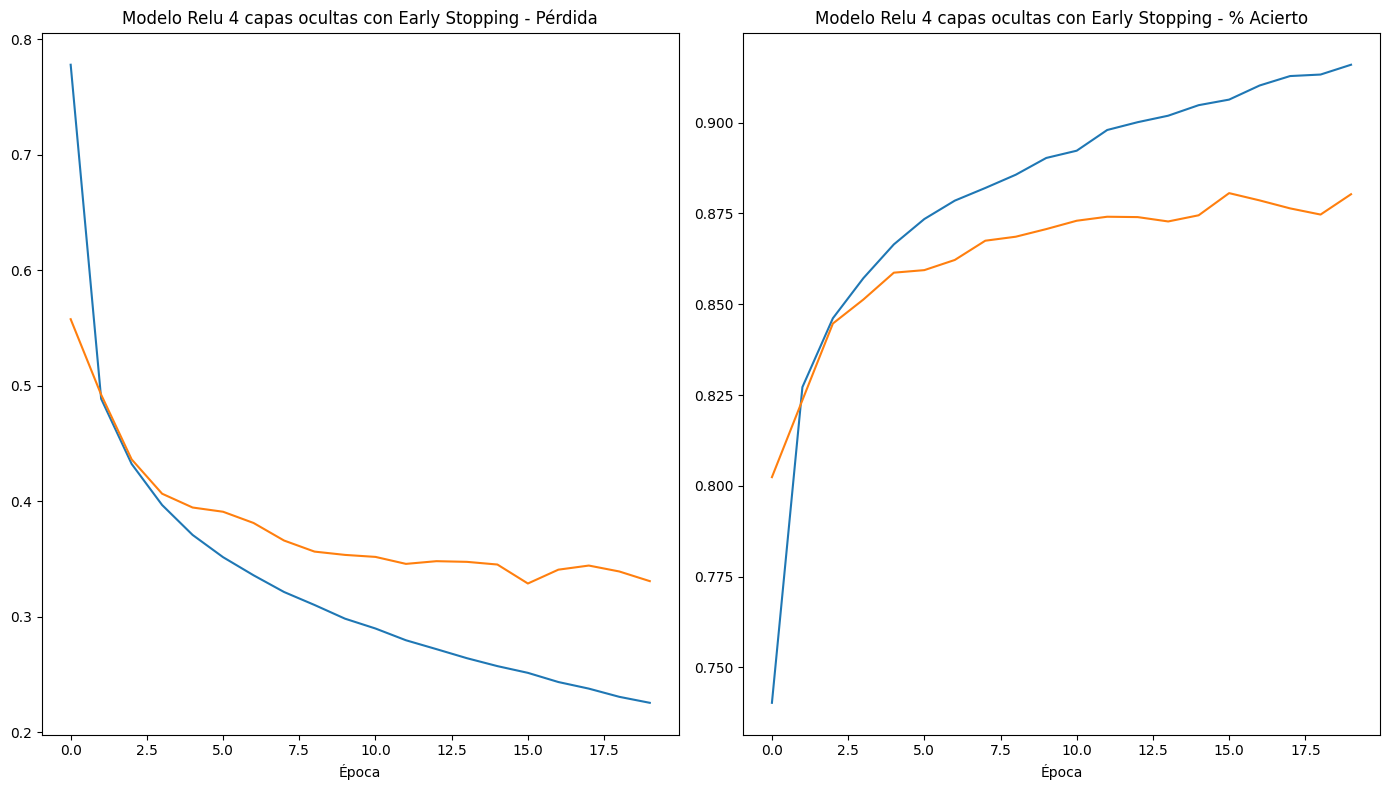

In [ ]:
## Regularizacion del modelo con Early Stopping

best_model_early = keras.Sequential()
best_model_early.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
best_model_early.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
best_model_early.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
best_model_early.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
best_model_early.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model = modelar(best_model_early, 'Modelo Relu 4 capas ocultas con Early Stopping', 'sgd', 20 , 32 , X_mlp, Y_mlp, X_test, y_test, [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])
models_info.append(model)
grafica_modelo(model, True)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4445 - loss: 11.6125 - val_accuracy: 0.7421 - val_loss: 7.4639
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6983 - loss: 6.6763 - val_accuracy: 0.7605 - val_loss: 4.1972
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7311 - loss: 3.7625 - val_accuracy: 0.7541 - val_loss: 2.3971
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7322 - loss: 2.2848 - val_accuracy: 0.7762 - val_loss: 1.7179
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7342 - loss: 1.7618 - val_accuracy: 0.7857 - val_loss: 1.4346
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7442 - loss: 1.5072 - val_accuracy: 0.7947 - val_loss: 1.2740
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7525 - loss: 1.3658 - val_accuracy: 0.7811 - val_loss: 1.1992
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7541 - loss: 1.2850 -

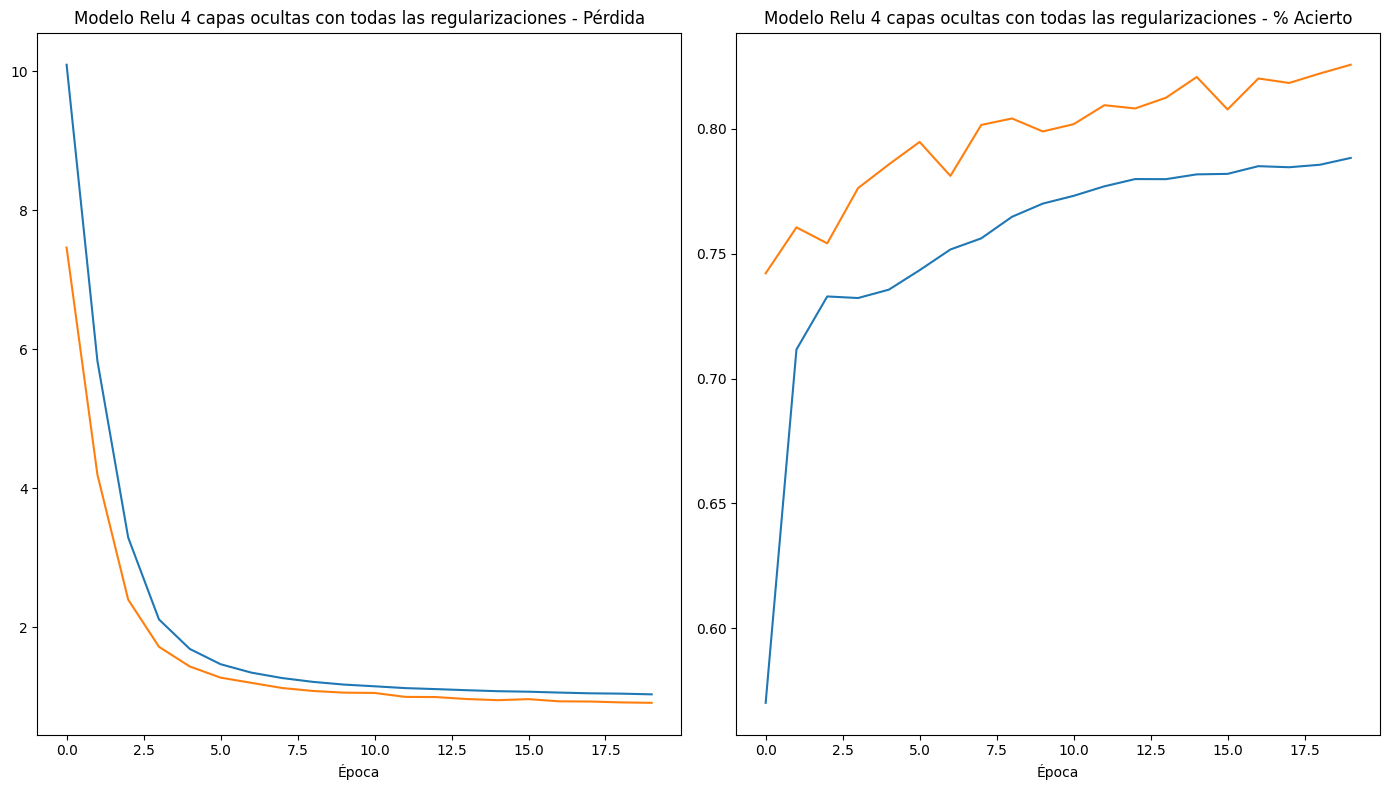

In [ ]:
## Regularizacion del modelo con L1, L2, Dropout y Early Stopping

best_model_all = keras.Sequential()
best_model_all.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa', kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
best_model_all.add(keras.layers.Dropout(0.2))
best_model_all.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa', kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
best_model_all.add(keras.layers.Dropout(0.2))
best_model_all.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa', kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
best_model_all.add(keras.layers.Dropout(0.2))
best_model_all.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa', kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
best_model_all.add(keras.layers.Dropout(0.2))

best_model_all.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model = modelar(best_model_all, 'Modelo Relu 4 capas ocultas con todas las regularizaciones', 'sgd', 20 , 32 , X_mlp, Y_mlp, X_test, y_test, [early_stopping])
models_info.append(model)

grafica_modelo(model, True)


Justificar y hacer análisis aquí.

In [ ]:
df = pd.DataFrame(models_info, columns=['Nombre', 'Tiempo de ejecución', 'Perdida', 'Accuracy', 'Val_Accuracy', 'Val_Loss'])
pd.set_option('display.max_colwidth', None)
df.sort_values(by='Val_Accuracy', ascending=False, inplace=True)
df

,Nombre,Tiempo de ejecución,Perdida,Accuracy,Val_Accuracy,Val_Loss
13,Modelo Relu 4 capas ocultas con Early Stopping,44.421229,0.225350,0.915950,0.8803,0.330692
11,Modelo Relu 4 capas ocultas con dropout,48.677468,0.341914,0.880583,0.8754,0.349288
14,Modelo Relu 4 capas ocultas con todas las regularizaciones,57.147883,1.033550,0.788300,0.8256,0.911608
10,Modelo Relu 4 capas ocultas con regularización L2,50.743802,0.919213,0.831150,0.8212,0.953648
9,Modelo Relu 4 capas ocultas con regularización L1,50.940886,1.420769,0.684217,0.6916,1.389797
12,Modelo Relu 4 capas ocultas con regularización L1 y L2,52.109402,1.923194,0.405950,0.4101,1.912160
0,Modelo Relu 2 capas ocultas,39.867739,0.281320,0.898800,NaN,NaN
1,Modelo Relu 3 capas ocultas,58.566704,0.244551,0.909617,NaN,NaN
2,Modelo Relu 4 capas ocultas,64.265838,0.227968,0.915383,NaN,NaN
3,Modelo Tanh 2 capas ocultas,31.241187,0.300465,0.891950,NaN,NaN


## Parte 4. Optimizadores y Normalización

En este apartado utilizar y fundamentar los diferentes optimizadores, cuál se desempeñó mejor, la arquitectura de red que seleccionaron para trabajar.
Registrar en la siguiente tabla los valores correspondientes a la mejor ejecución obtenida.

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Otro* } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text{ Loss } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text { Loss }\\
\hline \text{ __ capas } & \text { __ epocas} & {} & {} & {} & {} & {} & {} & {} & {}\\
\hline
\end{array}
\end{aligned}
$$


*Especificar el nombre del optimizador

Epoch 1/20


c:\Users\nibal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6770 - loss: 0.9128 - val_accuracy: 0.8330 - val_loss: 0.4513
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8302 - loss: 0.4868 - val_accuracy: 0.8485 - val_loss: 0.4209
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8476 - loss: 0.4345 - val_accuracy: 0.8569 - val_loss: 0.3972
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8547 - loss: 0.4110 - val_accuracy: 0.8627 - val_loss: 0.3800
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8615 - loss: 0.3933 - val_accuracy: 0.8650 - val_loss: 0.3838
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8675 - loss: 0.3744 - val_accuracy: 0.8525 - val_loss: 0.4178
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8722 - loss: 0.3636 - val_accuracy: 0.8690 - val_loss: 0.3677
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8763 - loss: 0.3510 - val_accurac

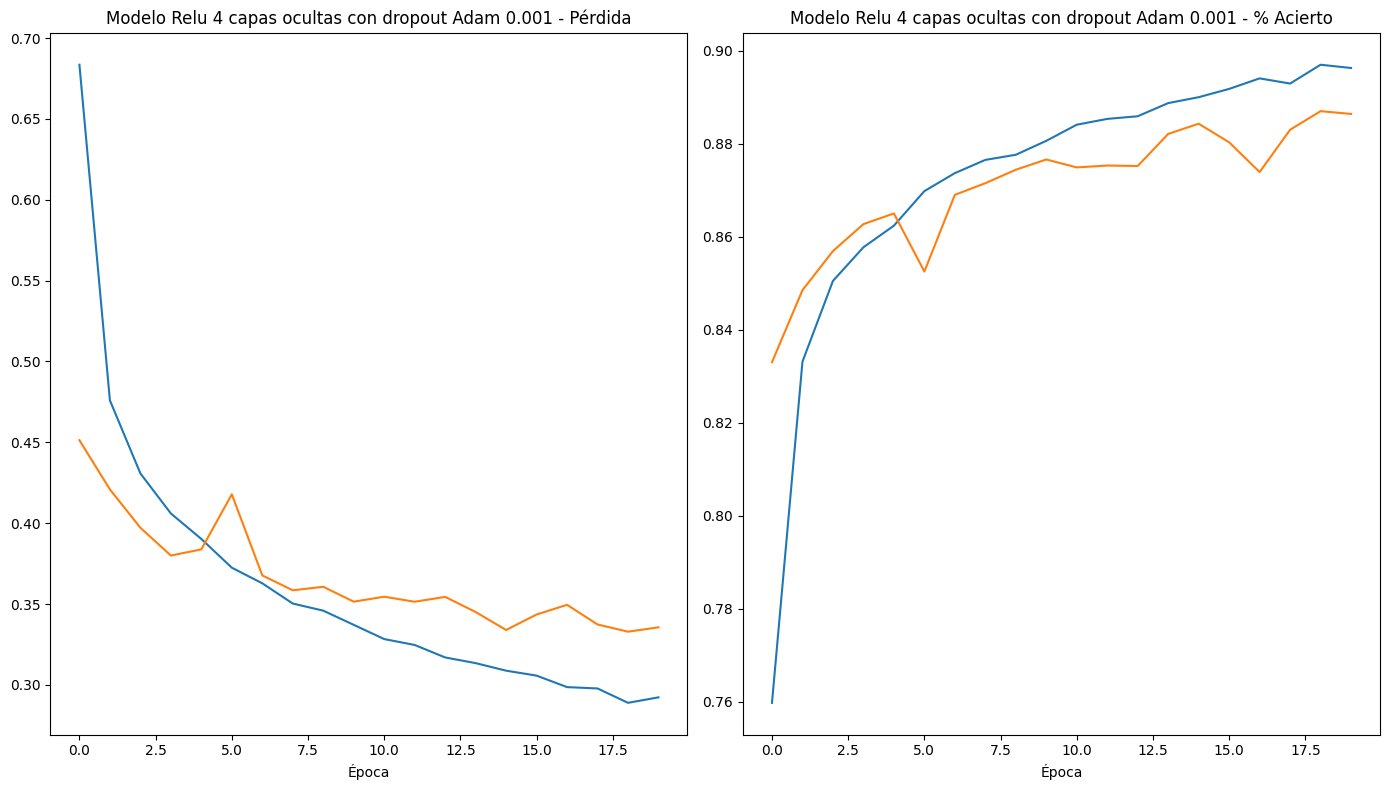

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9030 - loss: 0.2859 - val_accuracy: 0.8887 - val_loss: 0.3858
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9004 - loss: 0.3007 - val_accuracy: 0.8866 - val_loss: 0.4330
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8984 - loss: 0.3101 - val_accuracy: 0.8863 - val_loss: 0.4304
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8955 - loss: 0.3349 - val_accuracy: 0.8866 - val_loss: 0.4182
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8972 - loss: 0.3362 - val_accuracy: 0.8866 - val_loss: 0.4432
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8964 - loss: 0.3469 - val_accuracy: 0.8791 - val_loss: 0.4732
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8941 - loss: 0.3592 - val_accuracy: 0.8811 - val_loss: 0.4635
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8893 - loss: 0.3749 - 

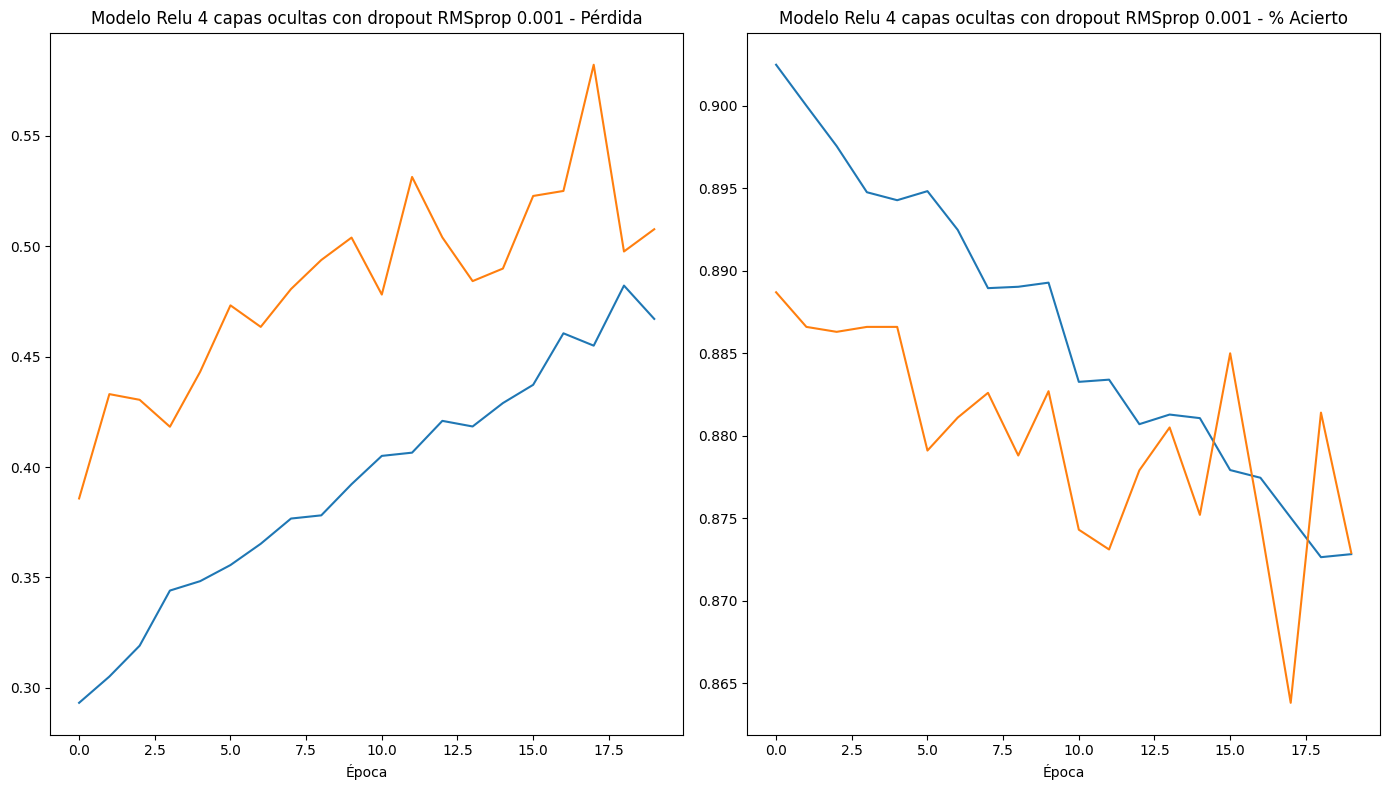

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8772 - loss: 0.4180 - val_accuracy: 0.8801 - val_loss: 0.4348
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8872 - loss: 0.3798 - val_accuracy: 0.8799 - val_loss: 0.4275
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8841 - loss: 0.3733 - val_accuracy: 0.8814 - val_loss: 0.4192
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8840 - loss: 0.3621 - val_accuracy: 0.8815 - val_loss: 0.4162
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8890 - loss: 0.3548 - val_accuracy: 0.8817 - val_loss: 0.4123
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8890 - loss: 0.3632 - val_accuracy: 0.8821 - val_loss: 0.4093
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8873 - loss: 0.3560 - val_accuracy: 0.8818 - val_loss: 0.4065
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8921 - loss: 0.3453 - 

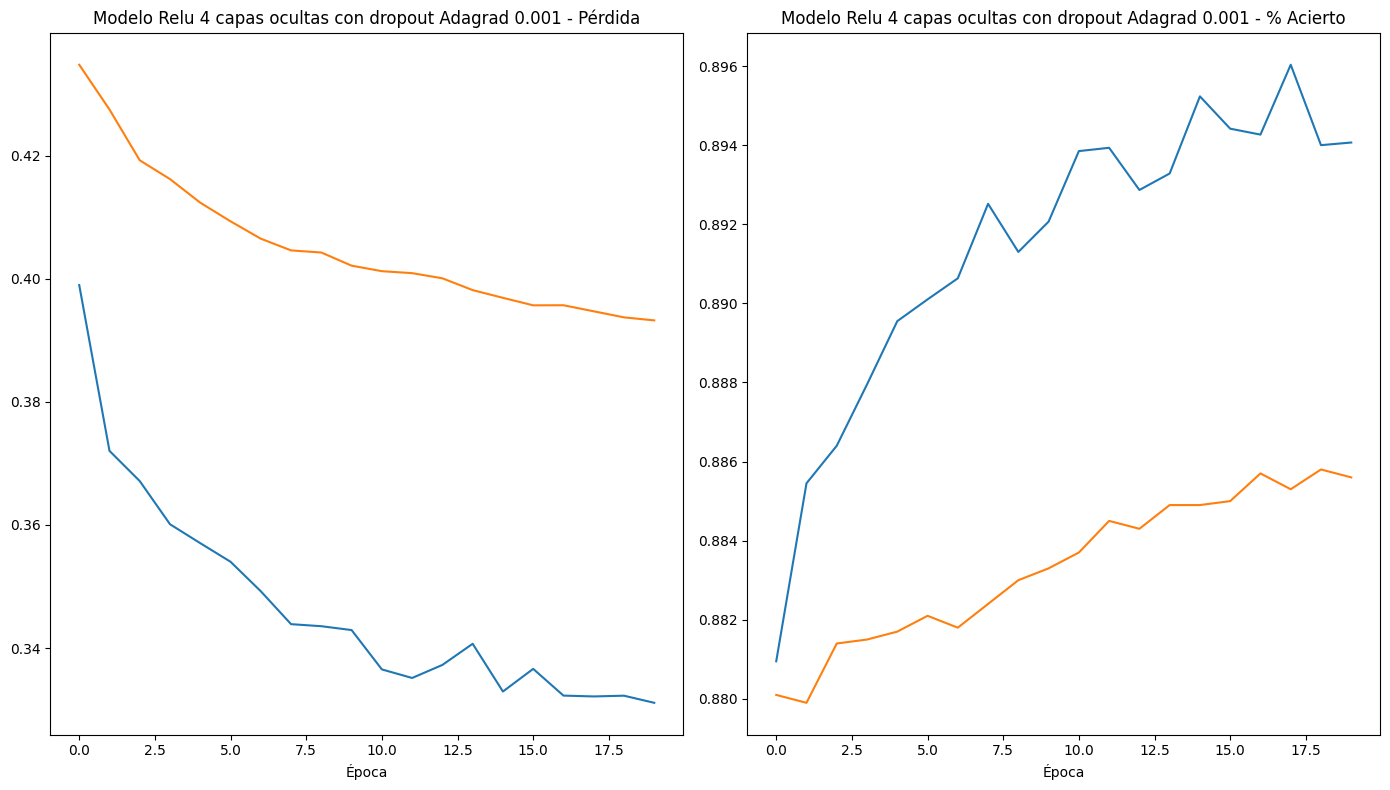

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8932 - loss: 0.3327 - val_accuracy: 0.8856 - val_loss: 0.3940
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8970 - loss: 0.3250 - val_accuracy: 0.8855 - val_loss: 0.3948
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8962 - loss: 0.3305 - val_accuracy: 0.8854 - val_loss: 0.3954
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8964 - loss: 0.3268 - val_accuracy: 0.8852 - val_loss: 0.3961
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8951 - loss: 0.3322 - val_accuracy: 0.8854 - val_loss: 0.3969
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8948 - loss: 0.3354 - val_accuracy: 0.8857 - val_loss: 0.3975
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8957 - loss: 0.3294 - val_accuracy: 0.8863 - val_loss: 0.3982
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8970 - loss: 0.3261 - 

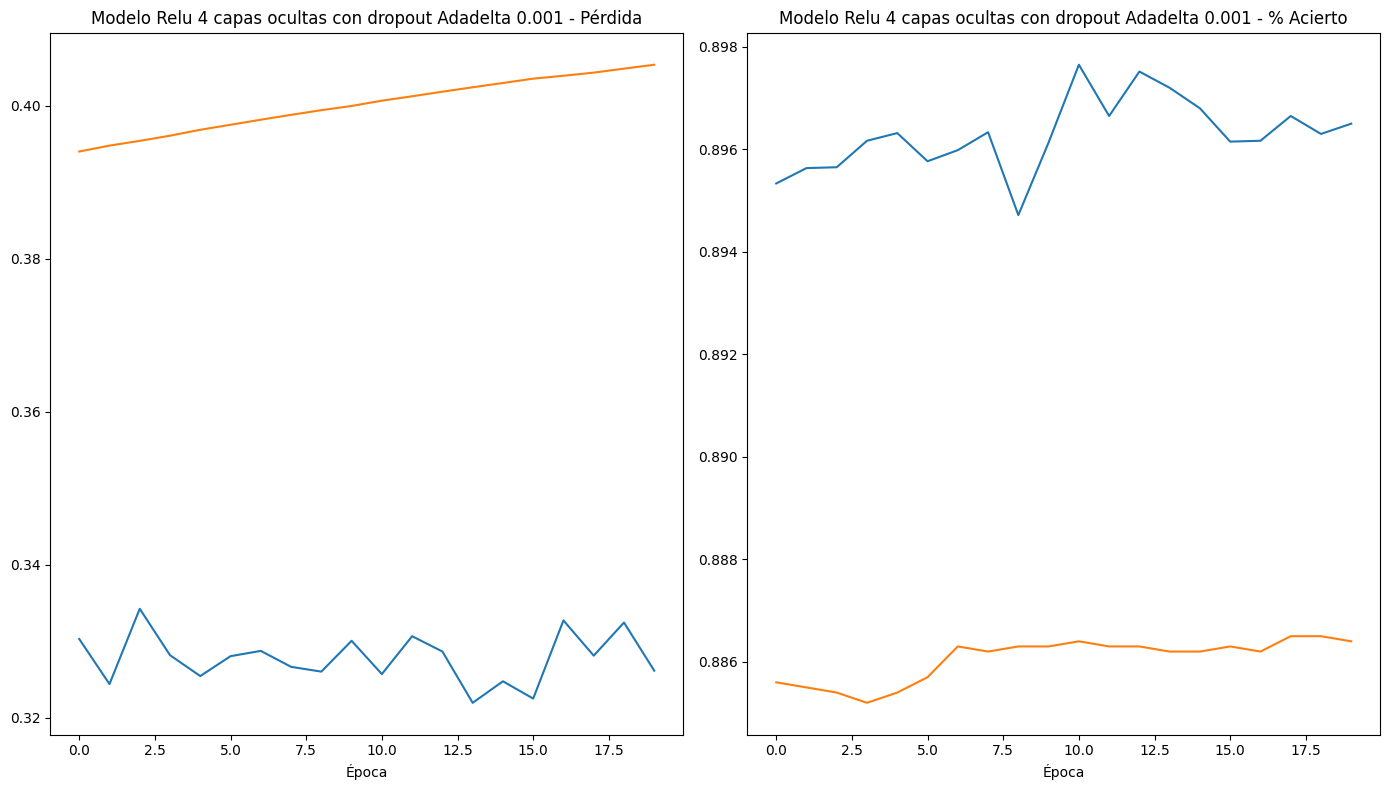

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8699 - loss: 0.4230 - val_accuracy: 0.8802 - val_loss: 0.3996
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8834 - loss: 0.3712 - val_accuracy: 0.8886 - val_loss: 0.3804
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8886 - loss: 0.3362 - val_accuracy: 0.8839 - val_loss: 0.3950
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8905 - loss: 0.3268 - val_accuracy: 0.8828 - val_loss: 0.3961
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8930 - loss: 0.3245 - val_accuracy: 0.8855 - val_loss: 0.4064
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8977 - loss: 0.2992 - val_accuracy: 0.8900 - val_loss: 0.3957
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8970 - loss: 0.3034 - val_accuracy: 0.8809 - val_loss: 0.4002
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8969 - loss: 0.3041 - 

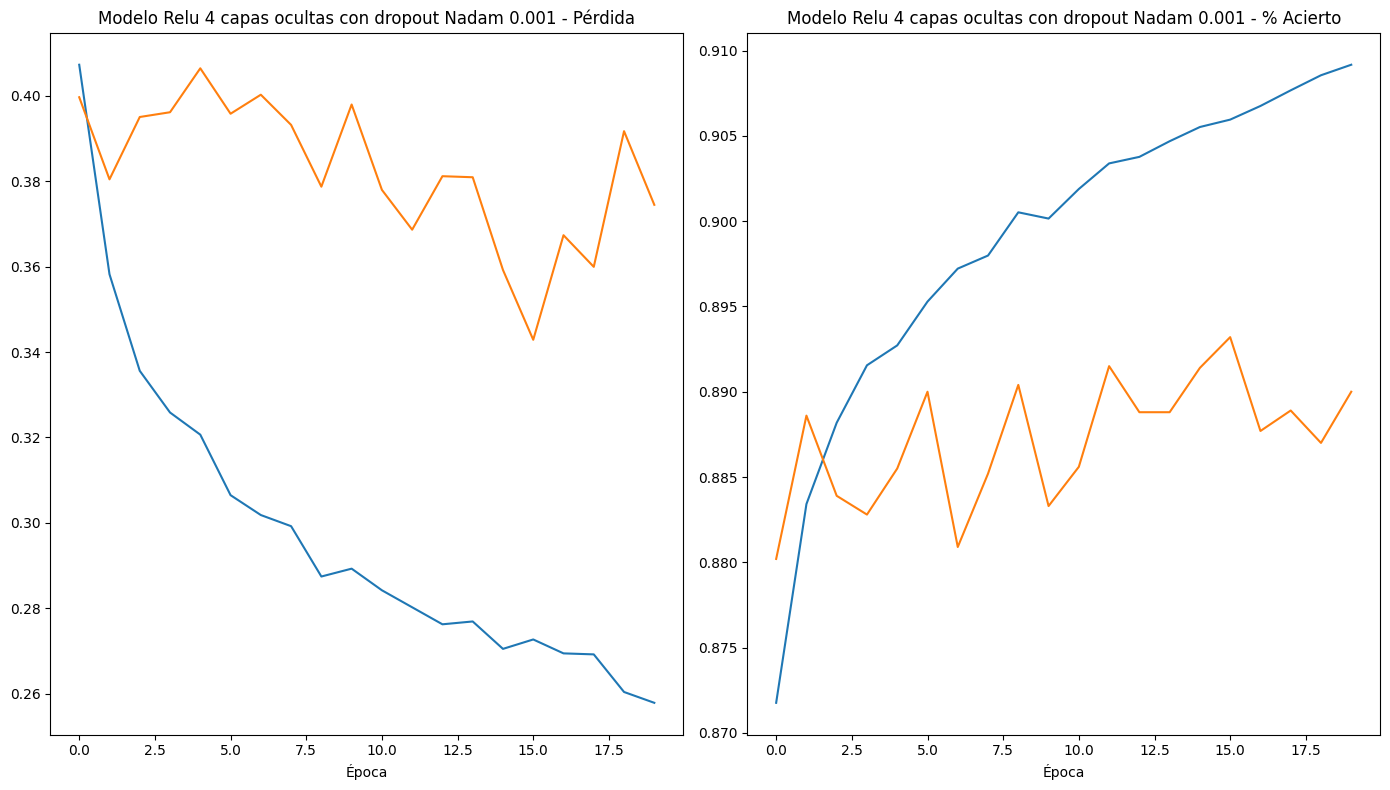

In [ ]:
# Modelo relu 4 capas con dropout y adam

best_model_dropout_optimizer = keras.Sequential()
best_model_dropout_optimizer.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
best_model_dropout_optimizer.add(keras.layers.Dropout(0.2))
best_model_dropout_optimizer.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
best_model_dropout_optimizer.add(keras.layers.Dropout(0.2))
best_model_dropout_optimizer.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
best_model_dropout_optimizer.add(keras.layers.Dropout(0.2))
best_model_dropout_optimizer.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
best_model_dropout_optimizer.add(keras.layers.Dropout(0.2))

best_model_dropout_optimizer.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

optimizer = [
    {"Nombre" : "Adam 0.001", "optimizer" : keras.optimizers.Adam(learning_rate=0.001)},
    {"Nombre" :"RMSprop 0.001", "optimizer" : keras.optimizers.RMSprop(learning_rate=0.001)},
    {"Nombre" :"Adagrad 0.001", "optimizer" : keras.optimizers.Adagrad(learning_rate=0.001)},
    {"Nombre" :"Adadelta 0.001", "optimizer" : keras.optimizers.Adadelta(learning_rate=0.001)},
    {"Nombre" :"Nadam 0.001", "optimizer" : keras.optimizers.Nadam(learning_rate=0.001)},

]
for opt in optimizer:
    model = modelar(best_model_dropout_optimizer, f'Modelo Relu 4 capas ocultas con dropout {opt["Nombre"]}', opt["optimizer"], 20 , 32 , X_mlp, Y_mlp, X_test, y_test)
    models_info.append(model)
    grafica_modelo(model, True)

In [ ]:
df = pd.DataFrame(models_info, columns=['Nombre', 'Tiempo de ejecución', 'Perdida', 'Accuracy', 'Val_Accuracy', 'Val_Loss'])
pd.set_option('display.max_colwidth', None)
df.sort_values(by='Val_Accuracy', ascending=False, inplace=True)
df

,Nombre,Tiempo de ejecución,Perdida,Accuracy,Val_Accuracy,Val_Loss
19,Modelo Relu 4 capas ocultas con dropout Nadam 0.001,72.006372,0.257925,0.909167,0.8900,0.374436
15,Modelo Relu 4 capas ocultas con dropout Adam 0.001,66.966207,0.292266,0.896283,0.8864,0.335563
18,Modelo Relu 4 capas ocultas con dropout Adadelta 0.001,73.972163,0.326155,0.896500,0.8864,0.405373
17,Modelo Relu 4 capas ocultas con dropout Adagrad 0.001,60.017205,0.331100,0.894067,0.8856,0.393229
13,Modelo Relu 4 capas ocultas con Early Stopping,44.421229,0.225350,0.915950,0.8803,0.330692
11,Modelo Relu 4 capas ocultas con dropout,48.677468,0.341914,0.880583,0.8754,0.349288
16,Modelo Relu 4 capas ocultas con dropout RMSprop 0.001,63.670479,0.467098,0.872817,0.8729,0.507724
14,Modelo Relu 4 capas ocultas con todas las regularizaciones,57.147883,1.033550,0.788300,0.8256,0.911608
10,Modelo Relu 4 capas ocultas con regularización L2,50.743802,0.919213,0.831150,0.8212,0.953648
9,Modelo Relu 4 capas ocultas con regularización L1,50.940886,1.420769,0.684217,0.6916,1.389797


Fundamentar la importancia que tienen las funciones de optimización, en qué influye escoger el optimizador adecuado para el modelo basándose en el desempeño y en la tasa de aprendizaje fija versus una adaptativa.

## Parte 5. Redes Convolucionales

Implementen en este apartado una nueva solución a la problemática planteada. La idea es conservar el número de neuronas, número de capas y todo lo que crean necesario, con el fin de hacer una comparación entre el resultado obtenido con MLP y ahora con una arquitectura Convolucional (CNN)

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.3. Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Analizar aquí las diferencias entre ambas arquitecturas y modelos construídos.

## Parte 6. Detallar la segunda problemática del caso planteado: Redes Recurrentes Parte 1

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Amazon.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Luego de implementarla, comenten qué diferencias tiene este tipo de red con una MLP a nivel de arquitectura, de parámetros, de hiperparámetros y de casos de uso.

In [ ]:
#####################################################################
#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.4. Mejor resultado con Recurrente Amazon }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Escribir análisis aquí.

## Parte 7.  Detallar la tercera problemática del caso planteado: Redes Recurrentes Parte 2.

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Twitter.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Analicen el impacto de este tipo de solución, basándose en el estado del arte y en el campo de análisis de sentimiento y procesamiento de lenguaje natural en deep learning.


In [ ]:
#####################################################################
#Programar aquí

#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.5. Mejor resultado con Recurrente Twitter }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ __ capas } & \text{__ épocas} & \text{} & \text{} & \text{}  & \text{} & \text{} & \text{}\\
\hline
\end{array}
\end{aligned}
$$



Ingresar análisis de lo realizado aquí, detallando el ajuste realizado, las técnicas utilizadas, funciones, optimizadores, normalización, etc. Fundamentar cómo fue que alcanzaron el máximo Accuracy y disminuyeron el Loss.

## Parte 9. Implementación Arquitecturas Especializadas

Fundamentar detalladamente en este apartado cómo podríamos generar una solución para EducaDL, considerando el uso de redes especializadas. De este apartado depende un futuro proyecto, por lo que recuerden especificarlo bien y considerar todos los detalles necesarios considerando tecnología, beneficios, problema a resolver, contexto socio-cultural, etc.


**IMPORTANTE:** Para efectos del ET, se deben ajustar sistemáticamente los hiperparámetros del modelo que están construyendo, independiente de los ajustes que se realizan en cada actividad para aprender el uso específico y puntual de los diferentes hiperparámetros. El modelo final que presenten en el ET, debe considerar la mejor combinación de hiperparámetros y sus ajustes revisados en el transcurso del desarrollo de la asignatura.